# LENDING CLUB CASE STUDY#

**Objective:** The goal is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. 

### Group Members: Dipayan Pramanik and Riddhi Tokdar

**Loading necessary Libraries** 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Load the dataset**

In [4]:
pd.set_option('display.max_columns', 500)
loans=pd.read_csv('loan.csv')

In [5]:
#check the shape of the loaded data
loans.shape

(39717, 111)

In [6]:
#check the head of data to get a basic idea of the data
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
#check information of the data
loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


**Data Cleaning**

Check number of NA values per column in the data

In [9]:
loans.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


From the above it can be concluded that there are number of columns that are only having NA values.
Those columns need to be dropped as they are not useful in the analysis.

Drop Columns having all values as NA

In [10]:
loans= loans.dropna(axis=1, how='all')

Check number of NA values again

In [11]:
loans.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
loans.shape

(39717, 57)

As it can be seen there are still some columns where NA values are present.
Figure out what percentage of the columbn are filled with NA values

In [13]:
missing_percentage = (loans.isnull().sum()/ len(loans))*100

In [14]:
missing_percentage

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


As it can be seen there are still some columns where more that 50% of data are NA

In [15]:
#check the data for columns having missing values
loans[list(missing_percentage[missing_percentage>0].index)].head()

,emp_title,emp_length,desc,title,mths_since_last_delinq,mths_since_last_record,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,NaN,NaN,83.70%,Jan-15,NaN,May-16,0.0,0.0,0.0,0.0
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,NaN,NaN,9.40%,Apr-13,NaN,Sep-13,0.0,0.0,0.0,0.0
2,NaN,10+ years,NaN,real estate business,NaN,NaN,98.50%,Jun-14,NaN,May-16,0.0,0.0,0.0,0.0
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,35.0,NaN,21%,Jan-15,NaN,Apr-16,0.0,0.0,0.0,0.0
4,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...,Personal,38.0,NaN,53.90%,May-16,Jun-16,May-16,0.0,0.0,0.0,0.0


Drop columns having more than 50% data missing. Figure a threshold value for non-NA values to drop the columns.

In [16]:
#find the threshold value
perc = 50.0
min_count =  int(((100-perc)/100)*loans.shape[0])
min_count

19858

In [17]:
#drop columns that has NA value more that the threshold value
# or keep the columns that have non-NA values at least the same count of min_count. 
loans = loans.dropna( axis=1, thresh=min_count)

In [18]:
#check percentage of NA values again
missing_percentage

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [19]:
#check the shape
loans.shape

(39717, 54)

In [20]:
#check the stas/description of each column
print(loans.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

From the above it can be seen that there are multiple columns that are having same value in all rows. Those columns are irrelevant for analysis purpose as they don't provide any additional information. So we can delete those columns

In [21]:
#identify columns having same values all over and store them in boolean form in a dataframe
min_max=pd.DataFrame(loans.min()==loans.max(),columns=['boolean'])

In [22]:
#store the name of those columns in a list
drop_columns=min_max[(min_max.boolean==True)].index.tolist()

In [23]:
#check the name of those columns
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [24]:
#drop those columns
loans=loans.drop(drop_columns,axis=1)

In [25]:
#check the shape of the dataframe again
loans.shape

(39717, 45)

In [26]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [27]:
#check missing percentage again
missing_percentage = (loans.isnull().sum()/ len(loans))*100
missing_percentage

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
o

Drop columns desc and url as url does not provide essential information. 
The data of desc can be found from other columns like issue_d, purpose etc.

In [28]:
loans=loans.drop(columns=['desc','url'],axis=1)

In [29]:
loans.shape

(39717, 43)

Check number of unique values per columns

In [30]:
loans.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [31]:
#check missing percentage again
missing_percentage = (loans.isnull().sum()/ len(loans))*100
missing_percentage[missing_percentage>0]

emp_title               6.191303
emp_length              2.706650
title                   0.027696
revol_util              0.125891
last_pymnt_d            0.178765
last_credit_pull_d      0.005036
pub_rec_bankruptcies    1.754916
dtype: float64

As it can be seen,the number of missing values are a very less percentage of the entire length of the column. The max is in employee title which is around 3000 among 39000. So, there are still 36000 rows left. We can drop the rows having na value

In [32]:
#shape before dropping NA values
loans.shape

(39717, 43)

In [33]:
#drop NA values
loans=loans.dropna()

In [34]:
#shape after dropping NA values
loans.shape

(36433, 43)

In [35]:
#list of columns
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

The columns id and member_id are just unique numbers assigned to each loan. So we can drop those column as they are not decisive factors behind loan default/payment.

In [36]:
#drop the columns
loans=loans.drop(columns=['id','member_id'],axis=1)

In [37]:
#check the shape after dropping
loans.shape

(36433, 41)

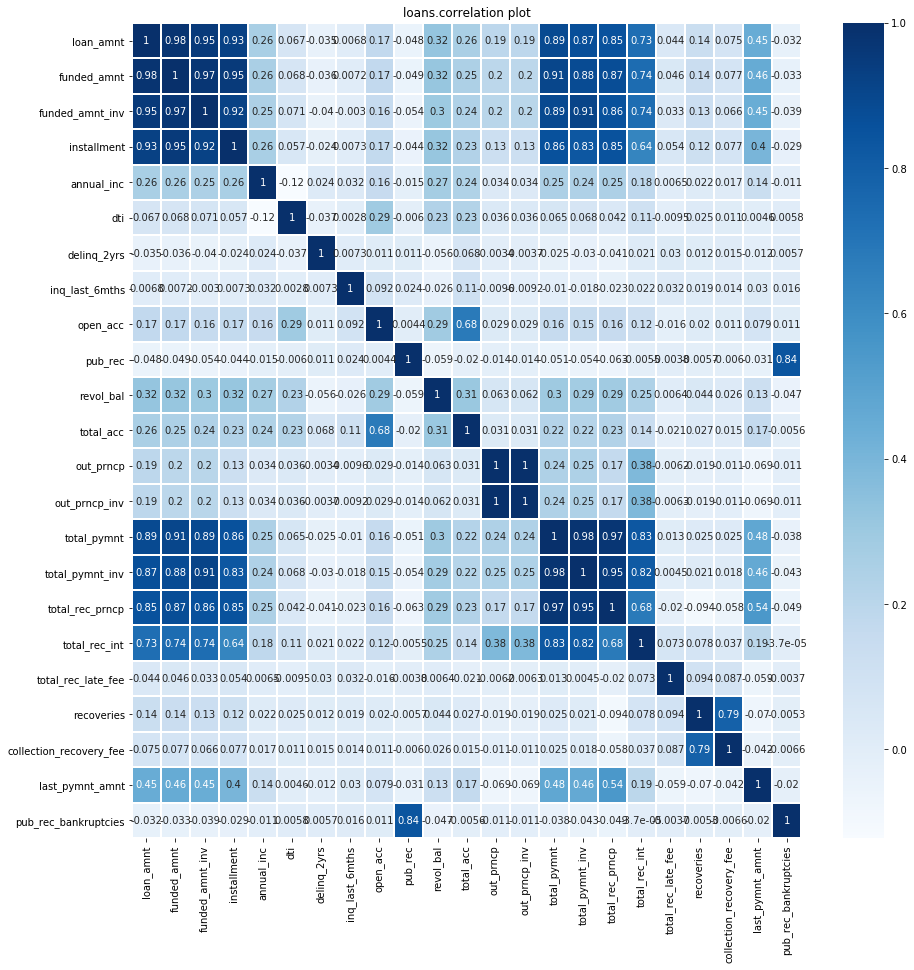

In [38]:
#check for highly correlated data
plt.figure(figsize=(15, 15))
sns.heatmap(loans.corr(),cmap='Blues',linecolor='white',annot=True,linewidths=1)
plt.title('loans.correlation plot')
plt.show()

The columns loan_amnt,funded_amnt,funded_amnt_inv are highly correlated. So we can take only loan_amount among the 3
as dropping other 2 columns won't affect findings.

In [39]:
#drop the columns
loans=loans.drop(columns=['funded_amnt','funded_amnt_inv'],axis=1)

In [40]:
#check the shape
loans.shape

(36433, 39)

In [41]:
#check the head
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


**Modifying values in columns**

In [42]:
#drop "months" from term
loans.term=loans['term'].str.strip('months').astype('int')

In [43]:
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [44]:
#reset index of dataframe
loans=loans.reset_index()
loans.head()

,index,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1,2500,60,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1,3,10000,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
2,4,3000,60,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
3,5,5000,36,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
4,6,7000,60,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [45]:
#drop the column 'index'
loans=loans.drop(columns='index',axis=1)

In [46]:
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,60,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1,10000,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
2,3000,60,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
3,5000,36,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
4,7000,60,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [47]:
#modify/trim % from int_rate and revol_util
loans.int_rate=loans['int_rate'].str.strip('%').astype('float')
loans.revol_util=loans['revol_util'].str.strip('%').astype('float')

In [48]:
#check the head
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
2,3000,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
3,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
4,7000,60,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


Change data type to datetime for certain columns-issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d

Format Code:

%b-->Month abbreviated	Eg:Jan, Feb, Sep

%y-->Year without century zero-padded Eg:02,95,99

In [49]:
#convert to date time
loans.issue_d = pd.to_datetime(loans.issue_d,format='%b-%y')
loans.last_pymnt_d= pd.to_datetime(loans.last_pymnt_d,format='%b-%y')
loans.earliest_cr_line= pd.to_datetime(loans.earliest_cr_line,format='%b-%y')
loans.last_credit_pull_d= pd.to_datetime(loans.last_credit_pull_d,format='%b-%y')

In [50]:
#check if changes were effective or not
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
1,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
2,3000,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
3,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
4,7000,60,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


In [51]:
#check unique values and number of occassions they are present in column
loans.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [52]:
#remove 'years' from emp_length
loans.emp_length=loans['emp_length'].str.rstrip('years')

In [53]:
#remove white space
loans.emp_length=loans['emp_length'].str.rstrip()

In [54]:
#check if changes were effective
loans.emp_length.value_counts()

10+    8407
2      4178
< 1    4052
3      3914
4      3297
5      3129
1      3026
6      2121
7      1697
8      1405
9      1207
Name: emp_length, dtype: int64

Replace <1 which 0.
Replace 10+ with 10

In [55]:
loans['emp_length'].replace({'10+':10,'< 1':0},inplace=True)

In [56]:
#check if changes worked or not
loans.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [57]:
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
1,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
2,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
3,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
4,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


In [58]:
#remove xx from zip_code
loans.zip_code=loans['zip_code'].str.rstrip('xx').astype('str')

In [59]:
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
1,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
2,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,972,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
3,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
4,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,280,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


**Sanity Checks**

The complete loan data for all loans issued through the time period 2007 t0 2011 is provided.

Issue Date year cannot be greater than 2011 and lower than 2007.

In [60]:
#check if there are any values greater than 2011 or not
(loans.issue_d.dt.year>2011).value_counts()

False    36433
Name: issue_d, dtype: int64

 Similarly earliest credit line year cannot be greater than 2011

In [61]:
(loans.earliest_cr_line.dt.year>2011).value_counts()

False    36383
True        50
Name: earliest_cr_line, dtype: int64

As it can be seen, there are 50 such values where the year is greater that 2011. It is likely that the year 19XX is interpreted as 20XX when they were converted to date time

In [62]:
#check those values
loans[loans.earliest_cr_line.dt.year > 2011 ].earliest_cr_line.dt.year.unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

In [63]:
#change the year of those dates from future date(after 2011) to 19XX
loans.loc[loans.earliest_cr_line.dt.year > 2011,'earliest_cr_line']=  loans.earliest_cr_line-pd.DateOffset(years=100)

In [64]:
#check individual year
loans.earliest_cr_line.dt.year.value_counts().sort_values()

1946       1
1956       1
1950       1
1954       1
1964       2
1962       3
1963       4
1965       6
1966       7
1968      12
1967      12
1969      22
1972      33
1971      34
1970      35
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
2008     144
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
2007     668
1988     671
1989     781
1991     884
1990     944
1992     970
2006    1079
1993    1398
2005    1406
2004    1639
2003    1740
2002    1794
1994    1860
1995    1974
1996    2074
1997    2271
2001    2363
1998    2645
1999    2763
2000    3034
Name: earliest_cr_line, dtype: int64

In [65]:
#check if years after 2011 are stil existing or not
(loans.earliest_cr_line.dt.year>2011).value_counts()

False    36433
Name: earliest_cr_line, dtype: int64

In [66]:
loans.shape

(36433, 39)

In [67]:
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
1,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
2,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,972,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
3,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
4,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,280,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


In [68]:
#derive a column for year
loans['issue_year']=loans.issue_d.dt.year

**Data Analysis**

Getting an idea of the data based on Loan Status

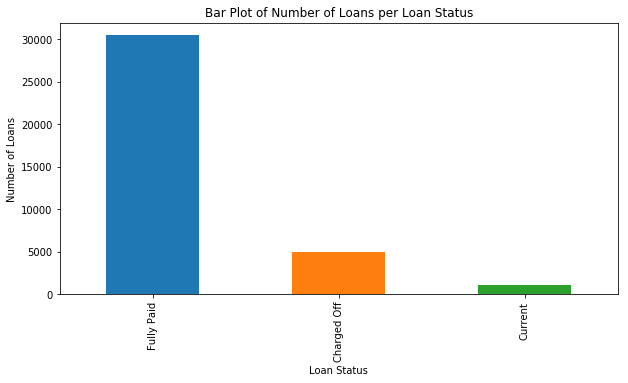

In [69]:
plt.figure(figsize=(10,5))
loans.loan_status.value_counts().plot.bar()
plt.title('Bar Plot of Number of Loans per Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.show()

In [70]:
(loans.loan_status.value_counts()/len(loans.loan_status))*100

Fully Paid     83.506711
Charged Off    13.567370
Current         2.925919
Name: loan_status, dtype: float64

From the above plot and analysis we can find that more that around 83.5% of the loans are fully paid, 13.5% are default and 2.9% are currently running

In [71]:
loans.loan_status.describe()

count          36433
unique             3
top       Fully Paid
freq           30424
Name: loan_status, dtype: object

The purpose of the analysis to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. So separate the data based on their loan status.

In [72]:
#default loans only
default_loans=loans[loans.loan_status=='Charged Off']
#paid loans only
paid_loans=loans[loans.loan_status=='Fully Paid']
#current loans only
current_loans=loans[loans.loan_status=='Current']
#loans without current loans as current loans are not significant in concluding whether a loan is risky or not
loans_master = loans[loans['loan_status'] != 'Current']

In [73]:
#loans_master.to_csv('master.csv')

In [74]:
#check if filter worked properly or not
loans_master.loan_status.unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [75]:
#create another column which flag defaulted as 1 and paid as 0 as it would help in calculating percentage in each category
loans_master['is_default']=loans_master['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1).astype('int32')

In [76]:
#check if changed occur correctly or not
loans_master.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,is_default
0,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,309,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,1
1,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,917,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2011,0
3,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,2011,0
4,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,280,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,2011,0
5,3000,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,900,CA,5.35,0,2007-01-01,2,4,0,8221,87.5,4,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0,2011,0


In [77]:
#check the value counts
loans_master.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [78]:
#check value counts of newly created is_default
loans_master.is_default.value_counts()

0    30424
1     4943
Name: is_default, dtype: int64

In [79]:
loans_master.is_default.dtype

dtype('int32')

Both Matches. Proves change was successful

In [80]:
loans_master.groupby('loan_status').describe()

annual_inc                                                        \
                 count          mean           std     min      25%      50%   
loan_status                                                                    
Charged Off     4943.0  63019.486686  47410.855336  4080.0  38400.0  54000.0   
Fully Paid     30424.0  70083.236679  66215.462181  4000.0  42000.0  60000.0   

                                collection_recovery_fee             \
                 75%        max                   count       mean   
loan_status                                                          
Charged Off  75000.0  1250000.0                  4943.0  86.067271   
Fully Paid   84000.0  6000000.0                 30424.0   0.000000   

                                                         delinq_2yrs  \
                    std  min  25%   50%     75%      max       count   
loan_status                                                            
Charged Off  374.043431  0.0  0.0  2.58  9.5545  7002.19      4943.0   
Fully Paid     0.000000  0.0  0.0  0.00  0.0000     0.00     30424.0   

                                                               dti             \
                 mean       std  min  25%  50%  75%   max    count       mean   
loan_status                                                                     
Charged Off  0.165082  0.529825  0.0  0.0  0.0  0.0   8.0   4943.0  14.160908   
Fully Paid   0.143275  0.486766  0.0  0.0  0.0  0.0  11.0  30424.0  13.280979   

                                                        inq_last_6mths  \
                  std  min    25%     50%    75%    max          count   
loan_status                                                              
Charged Off  6.522564  0.0  9.355  14.440  19.34  29.85         4943.0   
Fully Paid   6.646843  0.0  8.160  13.345  18.53  29.99        30424.0   

                                                         installment  \
                 mean       std  min  25%  50%  75%  max       count   
loan_status                                                            
Charged Off  1.046126  1.137055  0.0  0.0  1.0  2.0  8.0      4943.0   
Fully Paid   0.837891  1.049297  0.0  0.0  1.0  1.0  8.0     30424.0   

                                                                        \
                   mean         std    min       25%     50%       75%   
loan_status                                                              
Charged Off  338.848452  214.527655  22.79  172.4350  298.33  458.3150   
Fully Paid   321.638693  205.828423  16.08  167.2975  278.24  422.3075   

                     int_rate                                                  \
                 max    count       mean       std   min    25%    50%    75%   
loan_status                                                                     
Charged Off  1305.19   4943.0  13.929828  3.647619  5.42  11.49  13.79  16.45   
Fully Paid   1295.21  30424.0  11.667243  3.613734  5.42   8.59  11.49  14.09   

                   is_default                                    issue_year  \
               max      count mean  std  min  25%  50%  75%  max      count   
loan_status                                                                   
Charged Off  24.40     4943.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     4943.0   
Fully Paid   24.11    30424.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    30424.0   

                                                                            \
                    mean       std     min     25%     50%     75%     max   
loan_status                                                                  
Charged Off  2010.417560  0.813205  2007.0  2010.0  2011.0  2011.0  2011.0   
Fully Paid   2010.344432  0.811605  2007.0  2010.0  2011.0  2011.0  2011.0   

            last_pymnt_amnt                                            \
                      count         mean          std   min       25%   
loan_status                                        

The charged off loans are having higher average value compared to paid loans

# Analysis:

In [81]:
#define a function for categorical to plot bar plots
def cat_Bar_Plot(df_all,col):
    '''
    #convert into percentage
    plot_all=(df_all[col].value_counts()/len(df_all[col]))*100
    plot_default=(df_default[col].value_counts()/len(df_default[col]))*100
    plot_paid=(df_paid[col].value_counts()/len(df_paid[col]))*100
    
    limit_list=[plot_all.max(),plot_default.max(),plot_paid.max()]
    limit_y=max(limit_list)
    
    if (limit_y%5!=0):
        limit_y=(((limit_y//5)*5)+5)        
    
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,3,1)
    plt.ylim(0, limit_y)
    plt.xlabel(col+' type')
    plt.ylabel('Percentage based on overall count')
    plot_all[0:10].plot(kind='bar')
    plt.xticks(rotation=70)
    plt.title(col+' for all loans')
    
    plt.subplot(1,3,2)
    plt.ylim(0, limit_y)
    plt.xlabel(col+' type')
    plt.ylabel('Percentage')
    plot_default[0:10].plot(kind='bar')
    plt.xticks(rotation=70)
    plt.title(col+' for default loans')
    
    plt.subplot(1,3,3)
    plt.ylim(0, limit_y)
    plt.xlabel(col+' type')
    plt.ylabel('Percentage')
    plot_paid[0:10].plot(kind='bar')
    plt.xticks(rotation=70)
    plt.title(col+' for paid loans')
    plt.show()
    '''
    
    df_all.groupby('loan_status')[col].value_counts(1).unstack().plot(kind='bar',figsize=(14,8))
    plt.ylabel('Percentage based on overall count')
    plt.title('Bar plot based on Count')
    plt.show()
    #the mean *100 is equivalent to percentage of that category that are 1. The values are 1 and 0. 
    #So mean(sum/total)*100 would effectively gove away the percentage
    
    
    plt.figure(figsize=(14,8))
    sns.barplot(x=col, y='is_default', palette='mako',data=df_all)
    plt.title('Percentage of default within each Category')
    plt.ylabel('Default percentage in the category '+col + '(multiply by 100)')
    plt.xticks(rotation=70)
    plt.show()
      
   
    
    #print('Data Distribution for all loan status:\n',pd.DataFrame(plot_all))
    #print('\nData Distribution for default loan status:\n',pd.DataFrame(plot_default))
    #print('\nData Distribution for paid loan status:\n',pd.DataFrame(plot_paid))
    
    

In [82]:
 def percent_plot(df,col):
    sns.barplot(x=col, y='is_default', data=df)
    plt.title('Percentage of default within each Category')
    plt.ylabel('Default percentage in the category (multiply by 100)')
    plt.xticks(rotation=70)
    plt.show()

#the mean *100 is equivalent to percentage of that category that are 1. The values are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

**loan_amnt:**

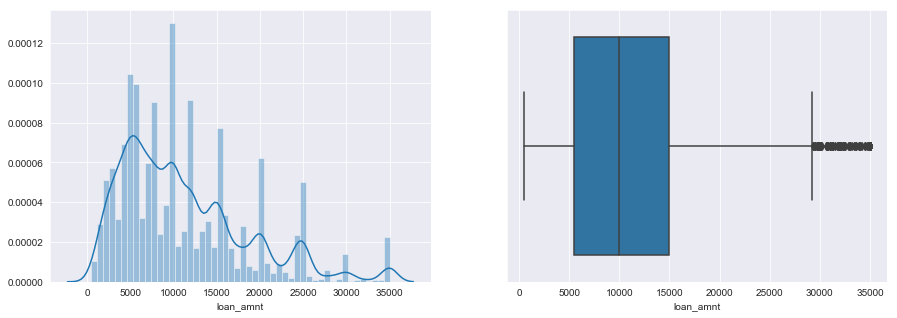

In [83]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loans_master.loan_amnt)
plt.subplot(1,2,2)
sns.boxplot(loans_master.loan_amnt)
plt.show()

The loan amount is distributed between 0 to 35000. The 75th percentile of the amount is below 15000 i.e. 75% of laons are below 15000. There are few loans more that 30000

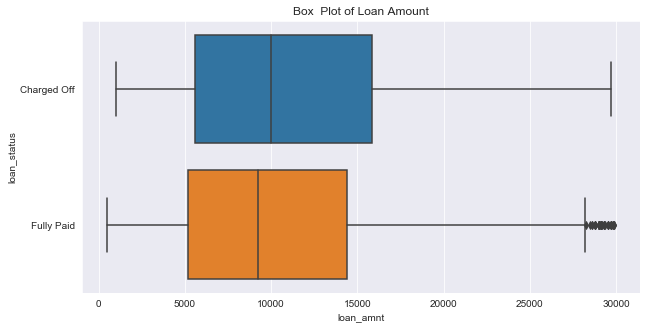

In [84]:
#boxplot of loans segmented by loan status
plt.figure(figsize=(10,5))
sns.boxplot(loans_master[loans_master.loan_amnt<30000].loan_amnt,loans_master.loan_status)
plt.title('Box  Plot of Loan Amount' )
plt.show()

For the loans below 30000, the default loans has a median value of 10000 and 75% data are below 16000.

In [85]:
# binning loan amount in segments for further analysis
def loan_bin(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loans_master['loan_amnt_bin'] = loans_master['loan_amnt'].apply(lambda x: loan_bin(x))

In [86]:
loans_master['loan_amnt_bin'].value_counts()

medium       19068
high          7147
low           6611
very high     2541
Name: loan_amnt_bin, dtype: int64

In [87]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='loan_amnt_bin',aggfunc='mean')

loan_amnt_bin,high,low,medium,very high
is_default,0.165804,0.128876,0.12576,0.199921


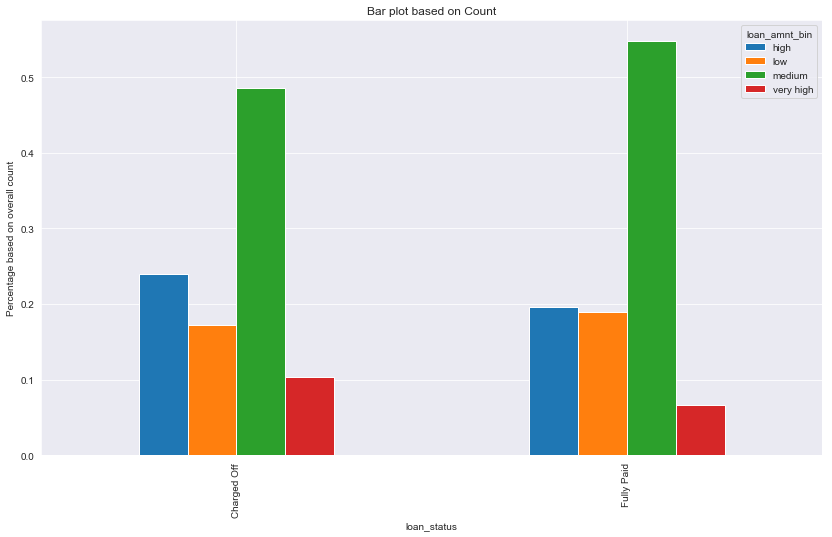

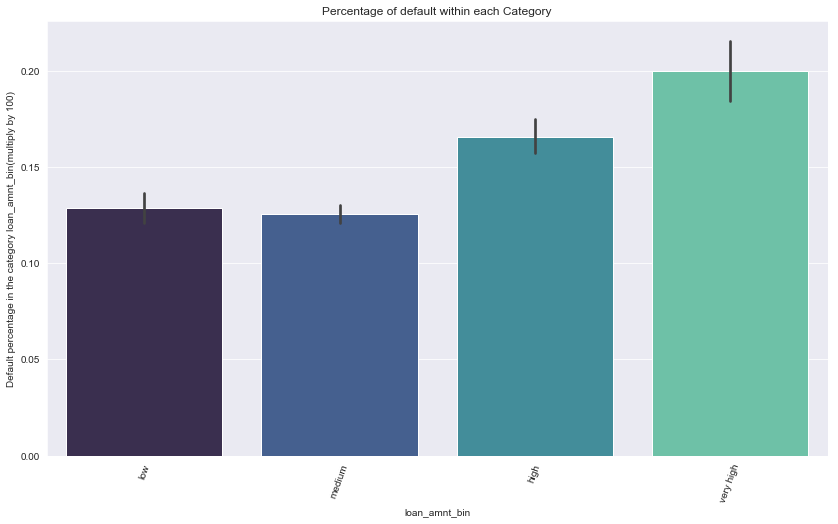

In [88]:
cat_Bar_Plot(loans_master,'loan_amnt_bin')

**Observation :** Most of the loans are between 5000 to 15000. Higher the loan amount, higher the default rate 

**term**

In [89]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='term',aggfunc='mean')

term,36,60
is_default,0.103499,0.246162


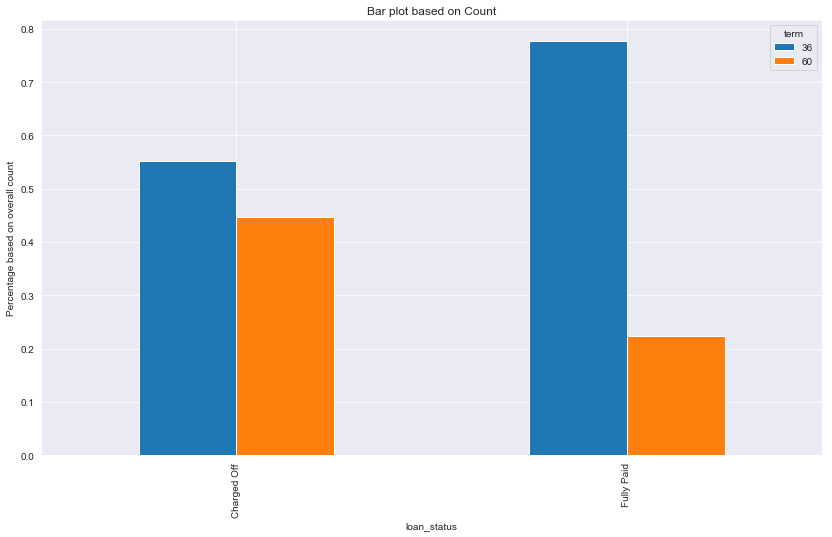

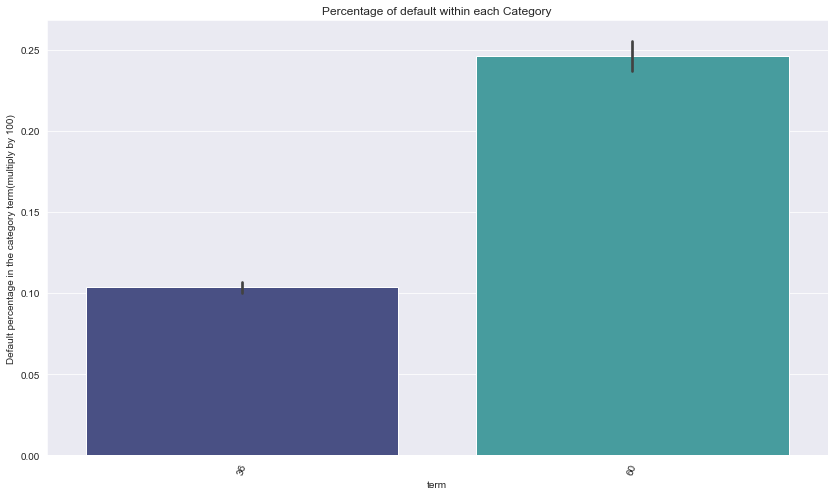

In [90]:
cat_Bar_Plot(loans_master,'term')

**Observation**:
Most of the paid/default loans are of 36 months tenure. In case of default loans, 55% are of 36 months, 45% is of 60 months. 
*However, if a loan is of tenure of 60 months, it has higher default rate (25%) compared to loans with 36 months tenure(10%)*

**int_rate**

In [91]:
loans_master.groupby('loan_status').int_rate.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


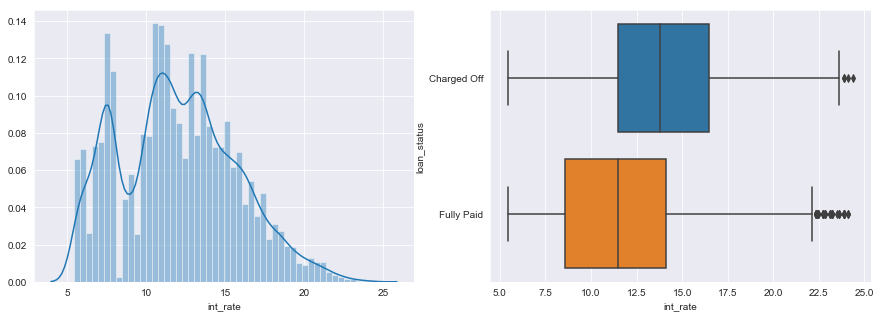

In [92]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loans_master.int_rate)
plt.subplot(1,2,2)
sns.boxplot(loans_master.int_rate,loans_master.loan_status)
plt.show()

From the above it can be observed that the interest rate varies with most interest rates between 5% to 20%.
It can also be obeserved, that loans that have defaulted has higher interest rate compared to those paid which 50% of the data between 11.5% to 16.45% 

In [93]:
def int_bin(n):
    if n < 5:
        return 'Less than 5'
    elif n >=5 and n <10:
        return '5 to 10'
    elif n >= 10 and n <  15:
        return '10 to 15'
    elif n >=15 and n <20:
        return '15 to 20'
    else:
        return 'above 20'
loans_master['int_rate_bin'] = loans_master['int_rate'].apply(lambda x: int_bin(x))

In [94]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='int_rate_bin',aggfunc='mean')

int_rate_bin,10 to 15,15 to 20,5 to 10,above 20
is_default,0.140034,0.241099,0.060642,0.372253


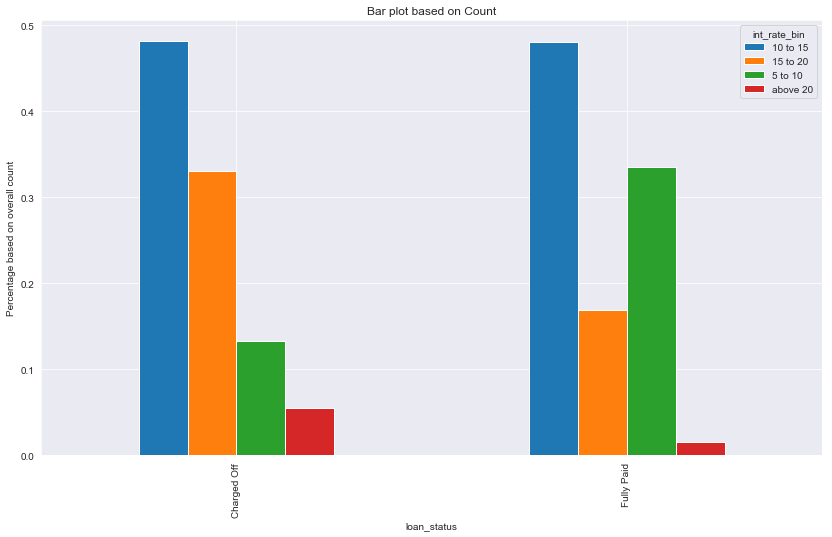

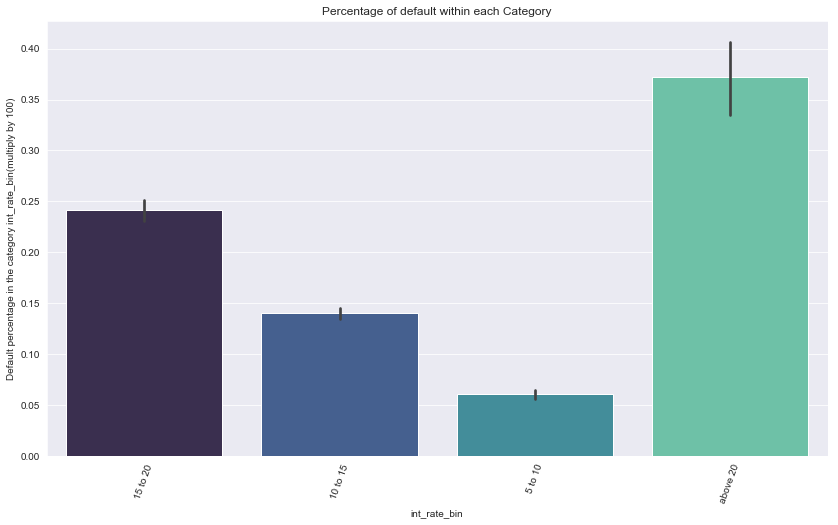

In [95]:
cat_Bar_Plot(loans_master,'int_rate_bin')

**Observation:** Most of the paid/default loans have rate between 10 to 15 percent.From the above plots we can observe that Percentage of defaults increases with the increase of interest rates in loan

**installment**

In [96]:
loans_master.groupby('loan_status').installment.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


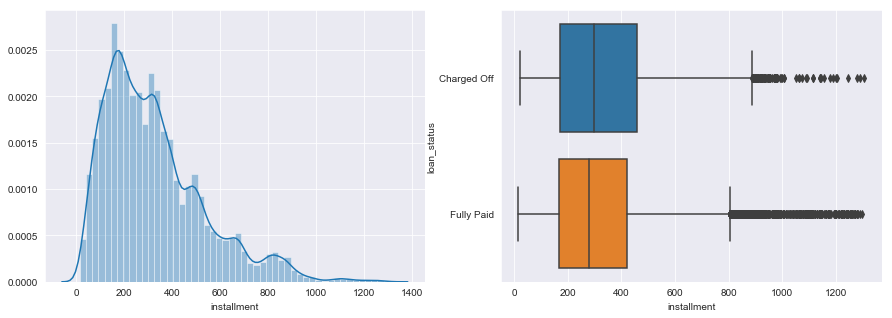

In [97]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loans_master.installment)
plt.subplot(1,2,2)
sns.boxplot(loans_master.installment,loans_master.loan_status)
plt.show()

In [98]:
#create segment for further plot and understanding
def install_bin(n):
    if n < 300:
        return 'Low'
    elif n >=300 and n <600:
        return 'Average'
    elif n >= 600 and n <  900:
        return 'High'
    else:
        return 'Very High'
loans_master['installment_bin'] = loans_master['installment'].apply(lambda x: install_bin(x))

In [99]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='installment_bin',aggfunc='mean')

installment_bin,Average,High,Low,Very High
is_default,0.144827,0.15444,0.132488,0.187633


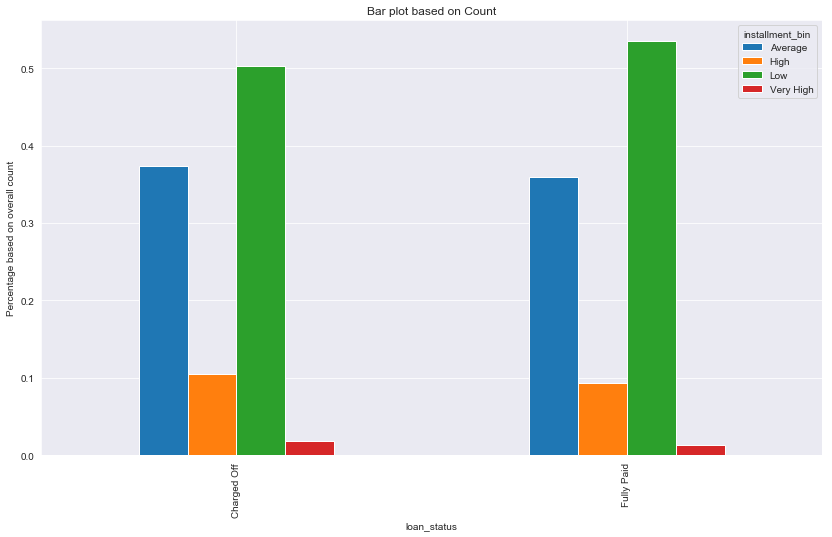

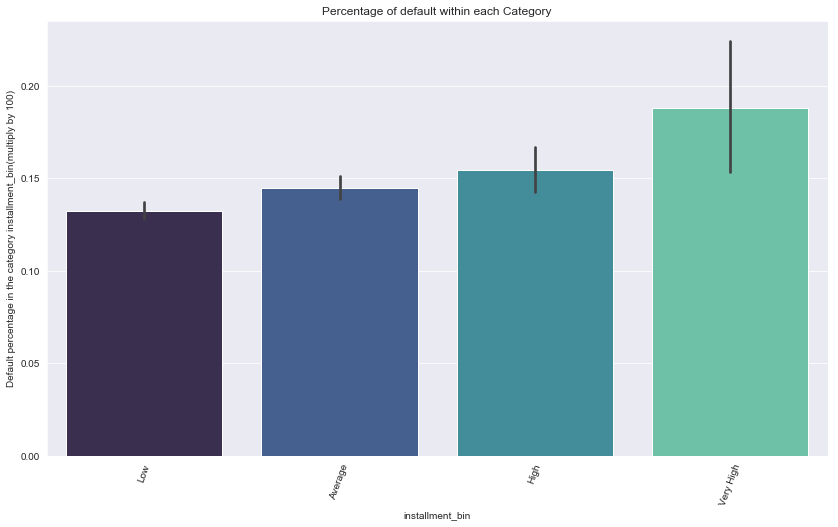

In [100]:
#plot percentage of default in each segment
cat_Bar_Plot(loans_master,'installment_bin')

**Observation:** Most loans have installment between 0 to 600.The above plots show that median installment for default loans is higher than paid loans. The default rate of loans increase with the increase of installment amount. However, the difference between highest and lowest is not significant

**grade:**

In [101]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='grade',aggfunc='mean')

grade,A,B,C,D,E,F,G
is_default,0.056127,0.116906,0.16293,0.210165,0.261185,0.317073,0.329787


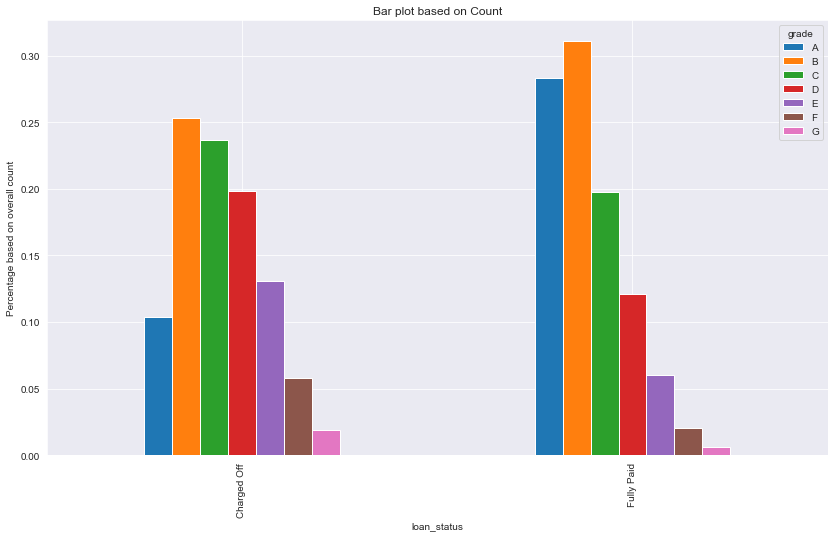

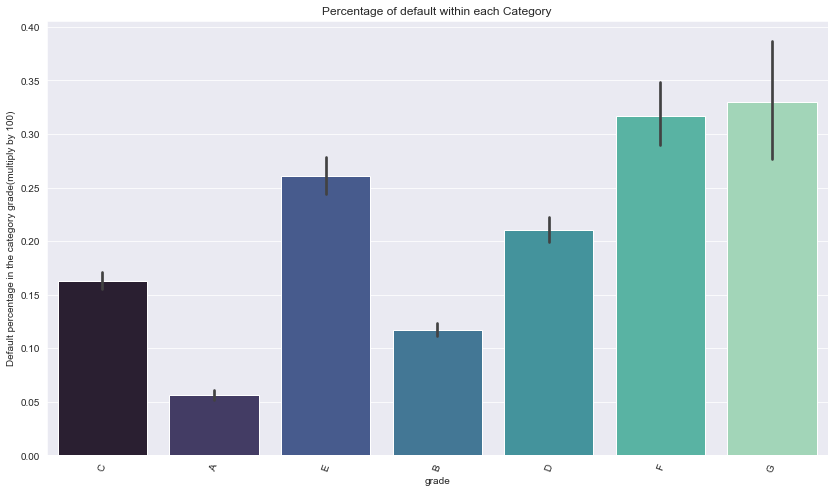

In [102]:
cat_Bar_Plot(loans_master,'grade')

**Observation:** The highest number of loans be it paid or default is for grade B. However, off all the grades, the default rate with a grade is higher if the loan is of grade G followed by grade F and grade E. 

**sub_grade:**

In [103]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',index='sub_grade',aggfunc='mean')

,is_default
sub_grade,
A1,0.022886
A2,0.046460
A3,0.049080
A4,0.059354
A5,0.075995
B1,0.087415
B2,0.104658
B3,0.118579
B4,0.125946


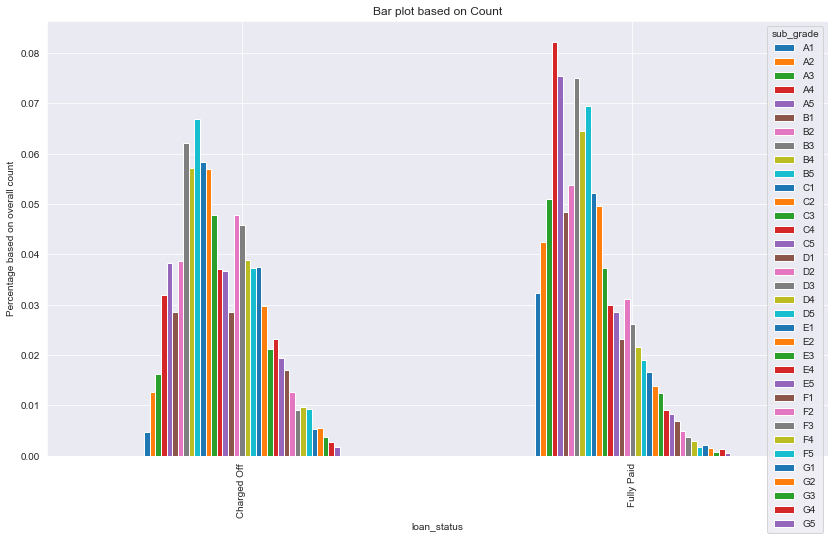

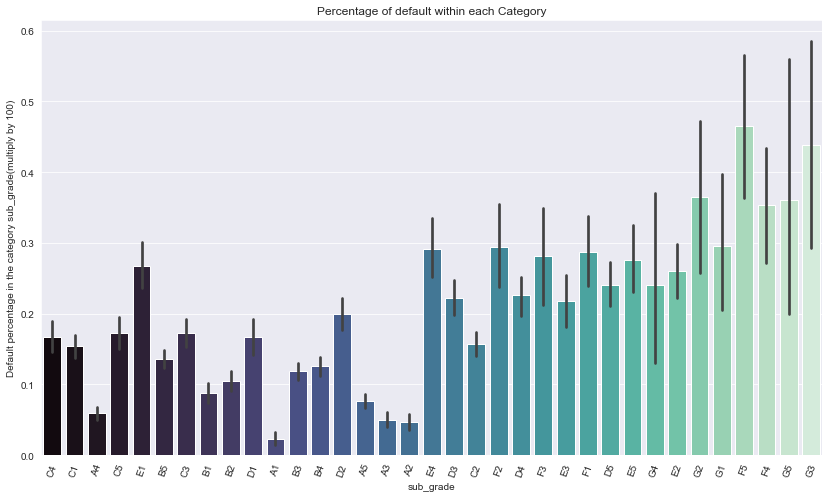

In [104]:
cat_Bar_Plot(loans_master,'sub_grade')

**Observation:** Subgrades like F5, G3 have higher percentage of default rates compared to others.

**home_ownership:**

In [105]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='home_ownership',aggfunc='mean')

home_ownership,MORTGAGE,OTHER,OWN,RENT
is_default,0.131312,0.191489,0.138124,0.147495


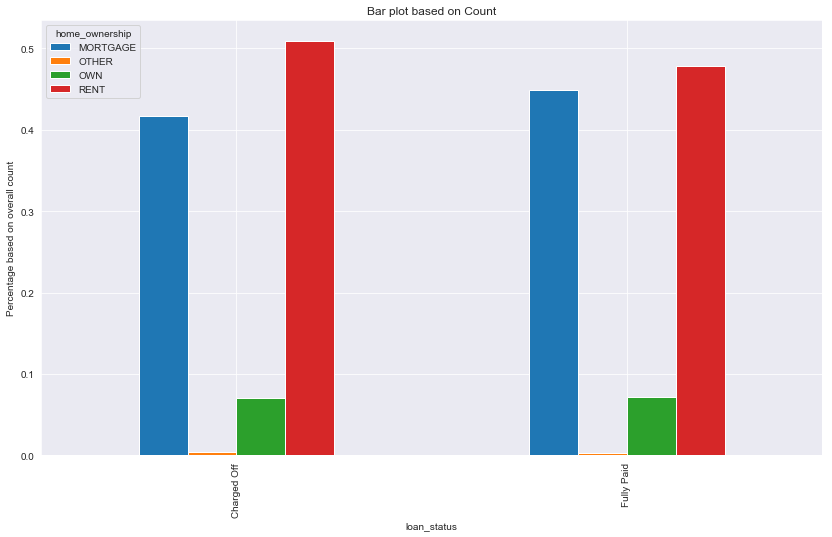

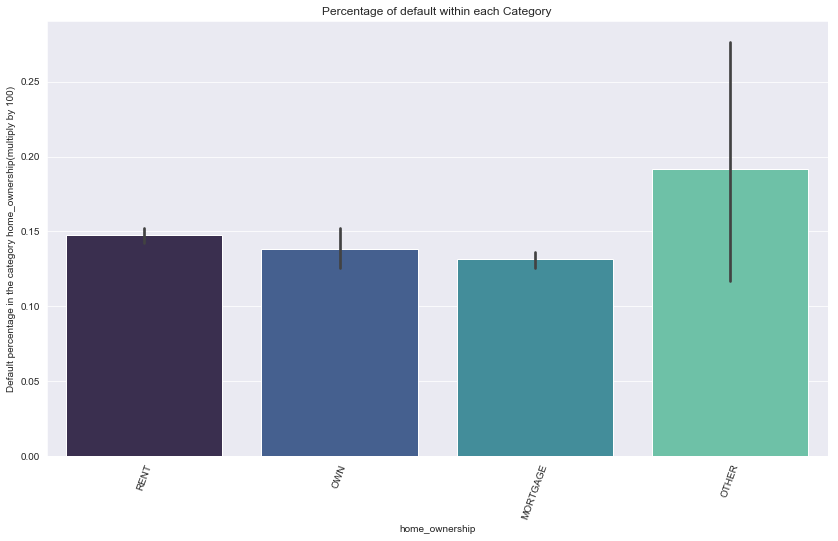

In [106]:
cat_Bar_Plot(loans_master,'home_ownership')

**Observation:** From the above plot and table, we can see that most of the ownership are rent, followed by mortgage. Less than 10% own a house. However,the percentage of defaulters within a category is highest in "other" but not significantly greater than other categories. So home ownership cannot be a significant contributer in defaults. 

**annual_income**

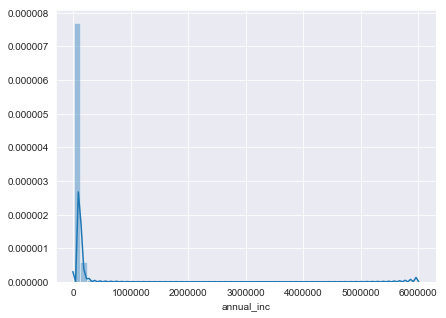

In [107]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loans_master.annual_inc)

The data is extremely skewed. Need to filter the data

In [108]:
loans_master.groupby('loan_status').annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.90])

,count,mean,std,min,10%,25%,50%,75%,90%,max
loan_status,,,,,,,,,,
Charged Off,4943.0,63019.486686,47410.855336,4080.0,28000.0,38400.0,54000.0,75000.0,104004.0,1250000.0
Fully Paid,30424.0,70083.236679,66215.462181,4000.0,30000.0,42000.0,60000.0,84000.0,116745.5,6000000.0


90% of data are below 120000. So we'd use that to filter the data

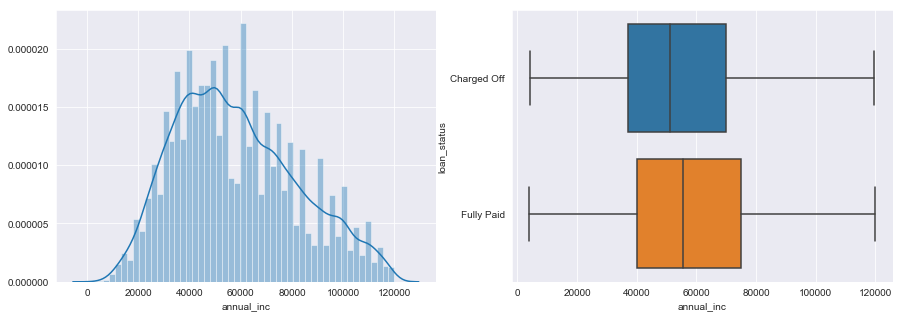

In [109]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loans_master[loans_master.annual_inc<120000.00].annual_inc)
plt.subplot(1,2,2)
sns.boxplot(loans_master[loans_master.annual_inc<120000.00].annual_inc,loans_master.loan_status)
plt.show()

In [110]:
#segment annual income for further analysis
def annual_inc_bin(n):
    if n < 40000:
        return 'Low'
    elif n >=40000 and n <80000:
        return 'Average'
    elif n >= 80000 and n < 120000:
        return 'High'
    else:
        return 'Very High'
loans_master['annual_inc_bin'] = loans_master['annual_inc'].apply(lambda x: annual_inc_bin(x))

In [111]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='annual_inc_bin',aggfunc='mean')

annual_inc_bin,Average,High,Low,Very High
is_default,0.142247,0.110723,0.172181,0.108364


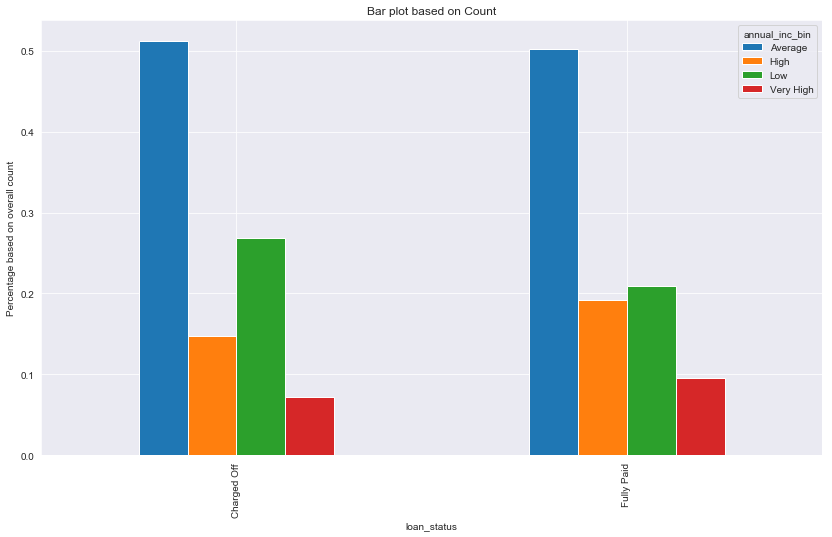

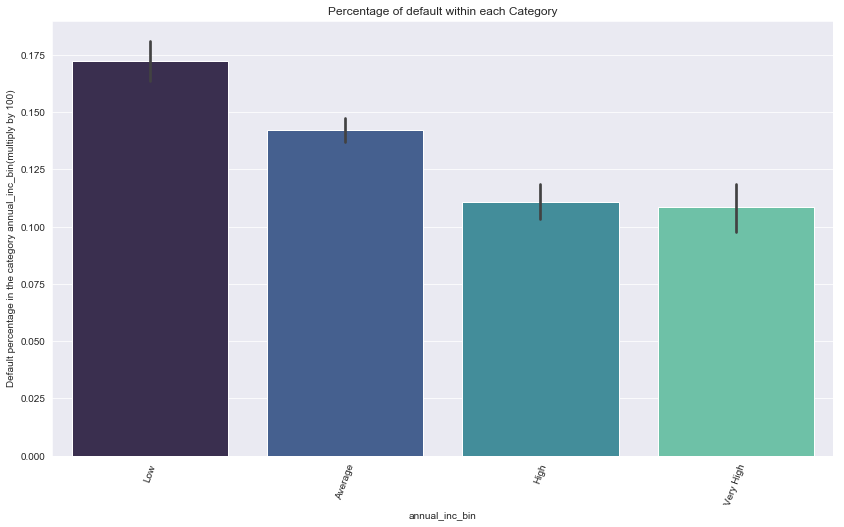

In [112]:
#plot percentage of default in each segment
cat_Bar_Plot(loans_master,'annual_inc_bin')

**observation:**
    
Most of the have annual income between 40000 to 80000. The annual income of those who have defaulted is lower compared to those who have paid. It can als be seen, the default percentage is decreasing as annual income is increasing    

**emp_length:**

In [113]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='emp_length',aggfunc='mean')

emp_length,0,10,1,2,3,4,5,6,7,8,9
is_default,0.133233,0.153587,0.137884,0.129562,0.135925,0.133188,0.138679,0.139185,0.151404,0.140338,0.125


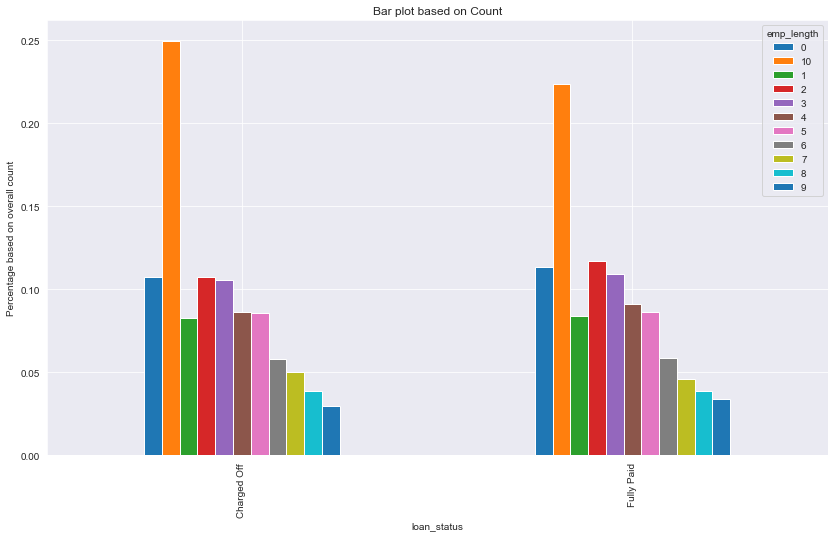

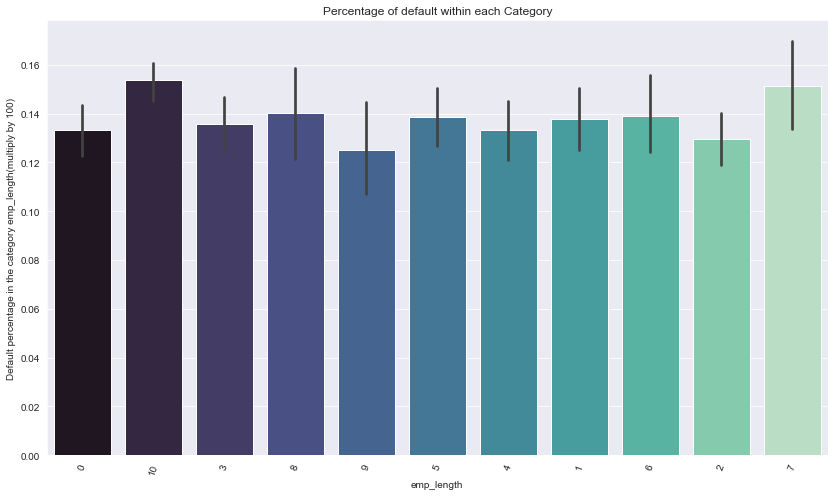

In [114]:
cat_Bar_Plot(loans_master,'emp_length')

**Observation:** Most of the employees of the loans have 10+ years. All employees have similar ratio of default/nondefault loans. So it cannot be considered as a contributing factor for default loans.

**verification_status:**

In [115]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='verification_status',aggfunc='mean')

verification_status,Not Verified,Source Verified,Verified
is_default,0.119272,0.14426,0.162897


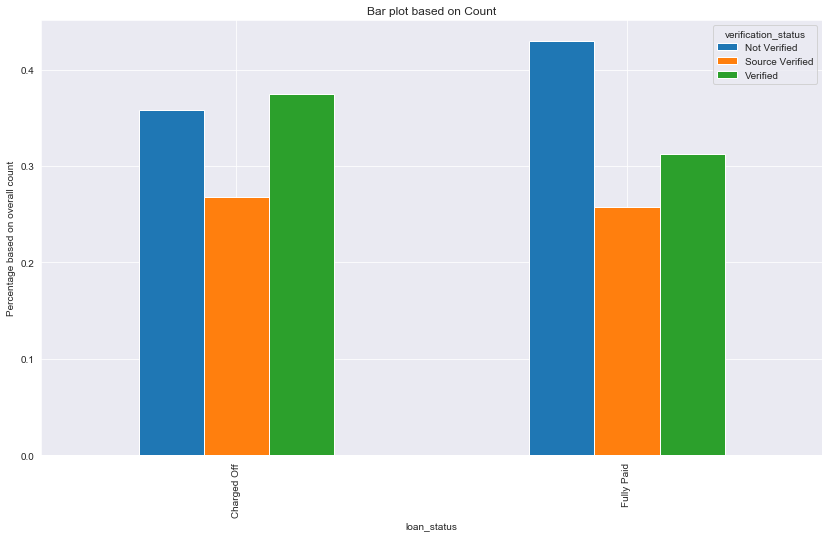

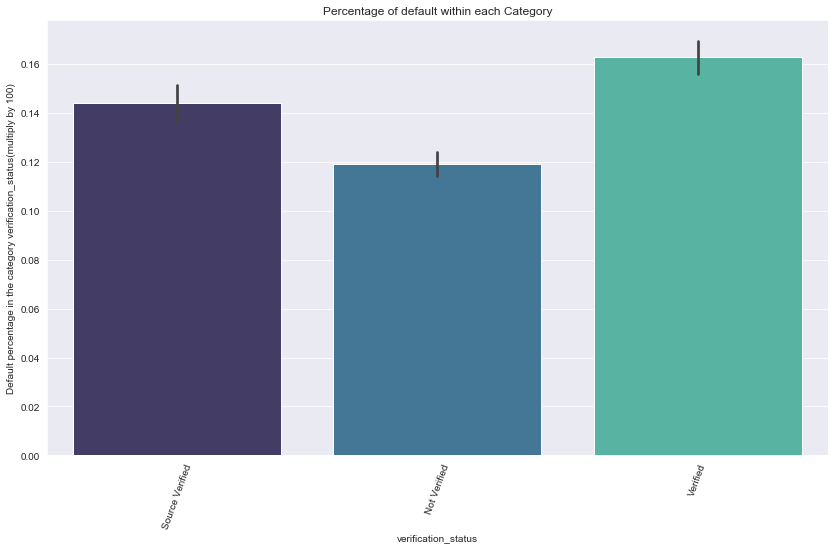

In [116]:
cat_Bar_Plot(loans_master,'verification_status')

**Observation:** Most loans are not verified. Among defaulted loans, about 37.5% are not verified, 36% are verified.
However, it can be seen that loans which has source verified or verified has higher percentage of default compared to loans are not verified. 



**Purpose:**

In [117]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='purpose',aggfunc='mean')

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
is_default,0.10681,0.103545,0.148365,0.163043,0.113236,0.157576,0.0963,0.152733,0.151052,0.157712,0.172414,0.263509,0.14759,0.095954


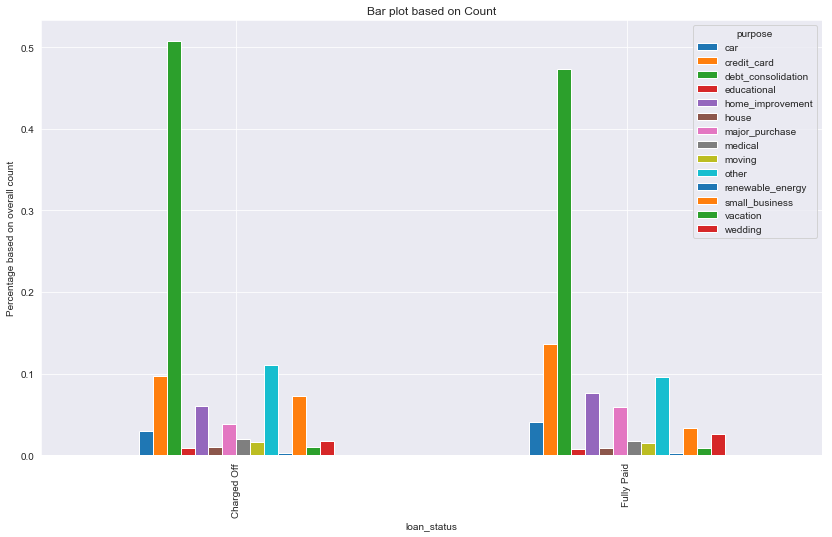

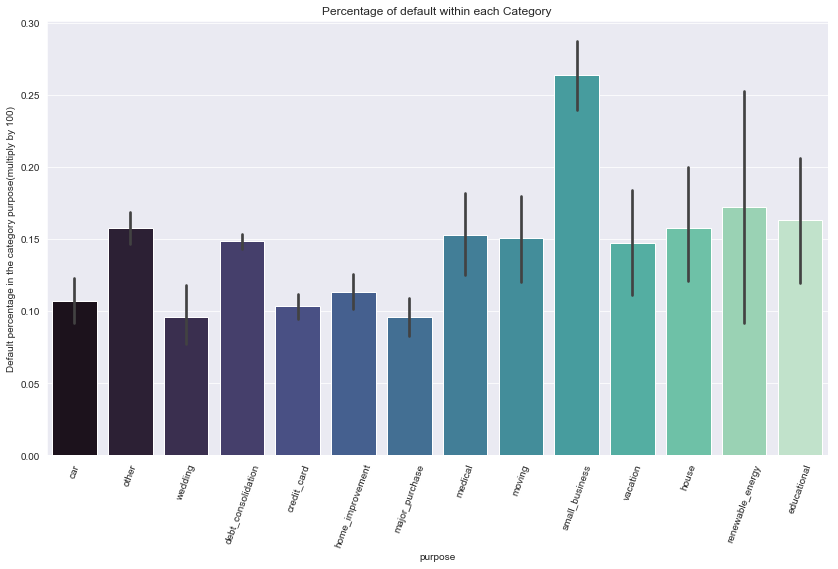

In [118]:
cat_Bar_Plot(loans_master,'purpose')

**Observations:**
The above shows that most of the loan purpose are for debt consolidation. More than 50% of the defaulted loans has purpose of debt_consolidation. 

However, if a borrower has mentioned the purpose as small_business, the average default rate within that purpose is significantly higher than other purposed mention

**addr_state:**

In [119]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='addr_state',aggfunc='mean')

addr_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,MI,MN,MO,MS,MT,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
is_default,0.205479,0.118388,0.115741,0.139842,0.152595,0.117302,0.119266,0.068966,0.104762,0.172387,0.154828,0.169935,0.0,0.0,0.135409,0.0,0.103004,0.146758,0.115681,0.117697,0.147368,0.138846,0.129964,0.155993,0.055556,0.126761,0.145833,0.0,0.148649,0.153569,0.171779,0.219457,0.129356,0.125912,0.136029,0.15869,0.116533,0.135135,0.14218,0.181818,0.2,0.111292,0.144105,0.128571,0.12766,0.152778,0.126615,0.127389,0.04


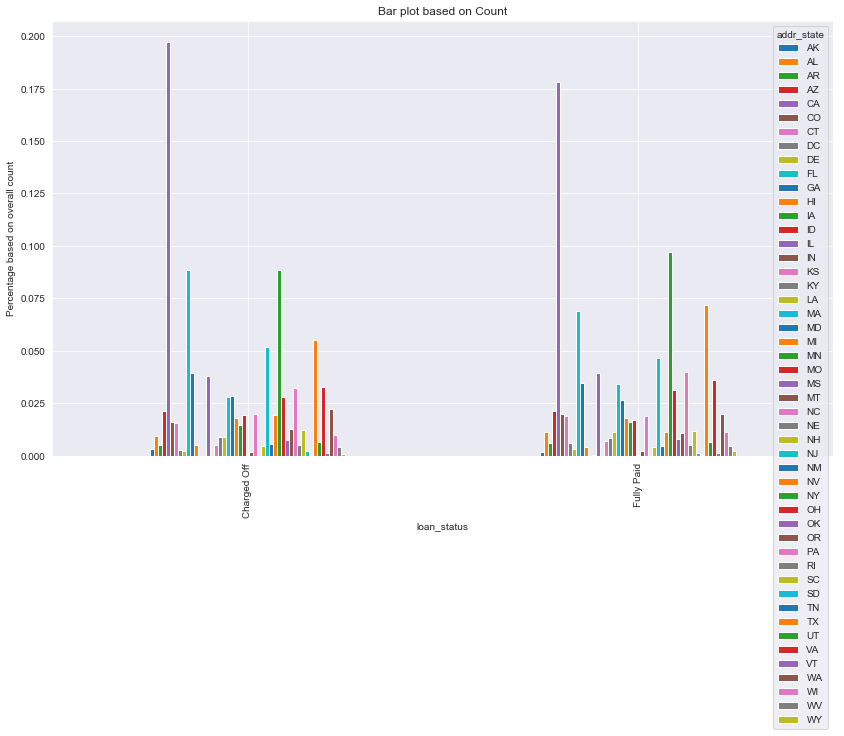

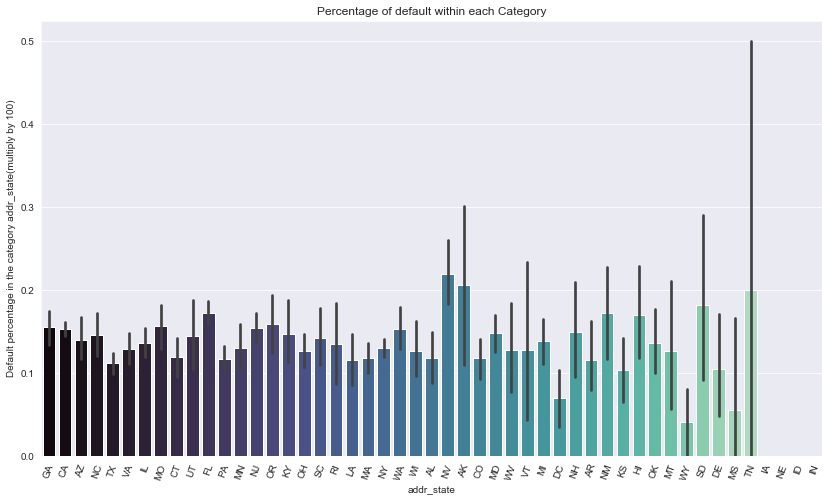

In [120]:
cat_Bar_Plot(loans_master,'addr_state')

**Observation :** Most loans are of State CA. About 20% of the defaulted loans are from CA. 

The 4th plot shows that if the state is NV or AK, there are higher rate of defaults

**issue_year:**

In [121]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='issue_year',aggfunc='mean')

issue_year,2007,2008,2009,2010,2011
is_default,0.333333,0.151947,0.122315,0.12126,0.153536


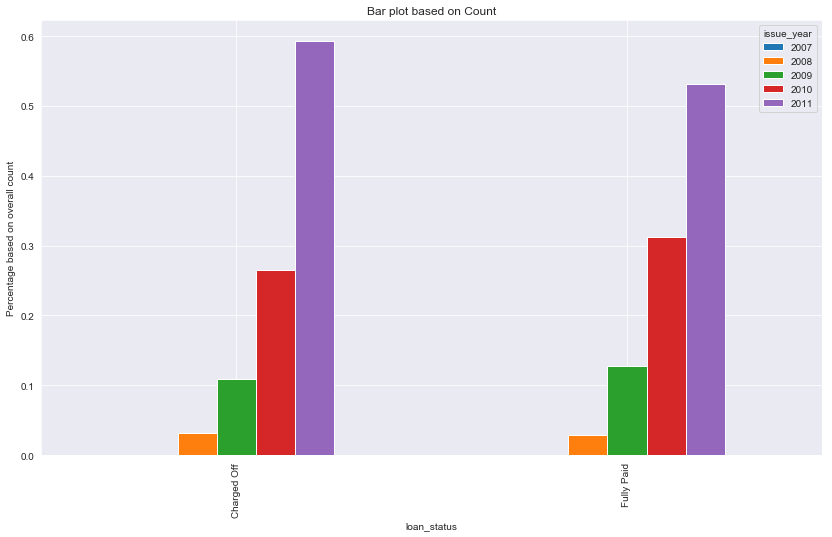

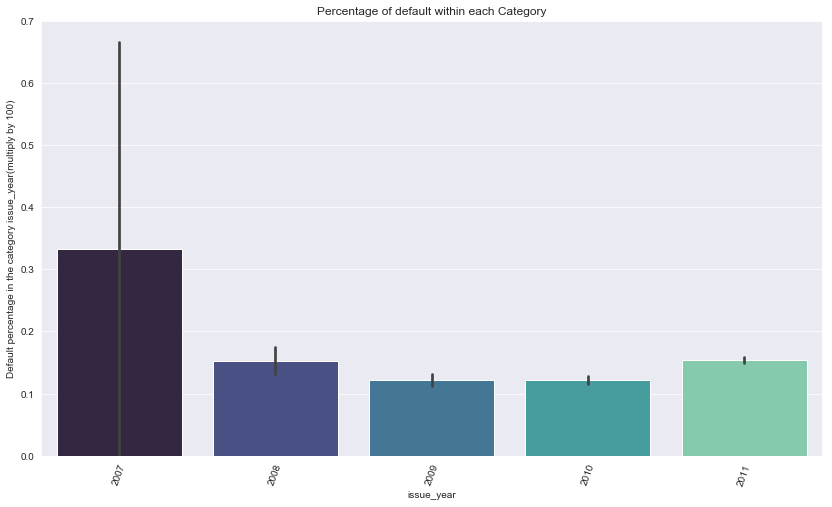

In [122]:
cat_Bar_Plot(loans_master,'issue_year')

**Observation:**
The number of loans be it default or paid has increased from 2007 to 2011. 

It can also be seen that about 35% of loans issued in 2007 has defaulted. The percentage had then decreased but there was an increase in default percentage in 2011

**issue_month**

In [123]:
#filter the year from date
loans_master['issue_month']=loans_master.issue_d.dt.month


In [124]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='issue_month',aggfunc='mean')

issue_month,1,2,3,4,5,6,7,8,9,10,11,12
is_default,0.125488,0.108911,0.120668,0.127763,0.154098,0.144105,0.139005,0.134253,0.151404,0.148719,0.140566,0.156806


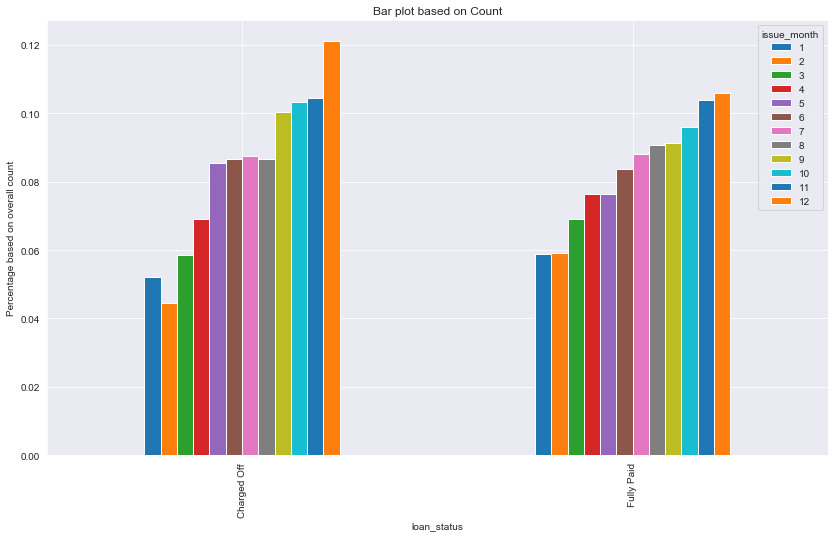

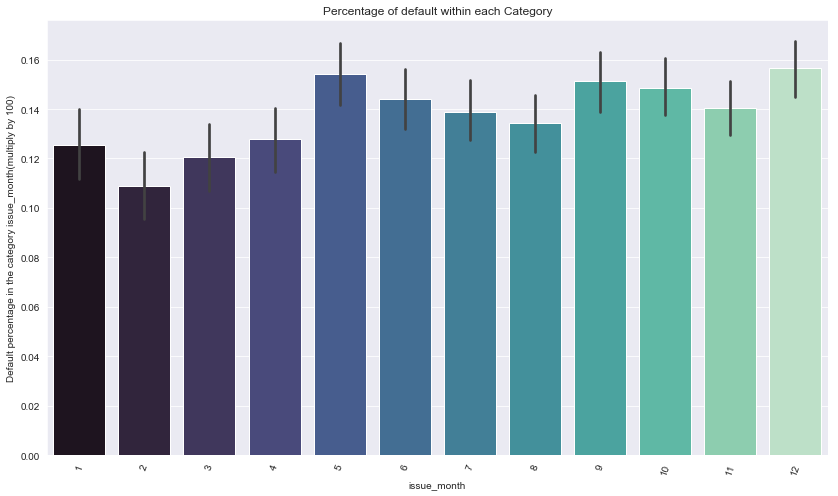

In [125]:
cat_Bar_Plot(loans_master,'issue_month')

**Observation:** It can be seen that there is a increase of loans approved as the year end approches near. December sees most number of loans issued. Also loans issued in December has highest default rates while loans issued in February has lowest default rate. The difference in percentage between highest and lowest is about 5%.  

**dti**

In [126]:
#debt to income
loans_master.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

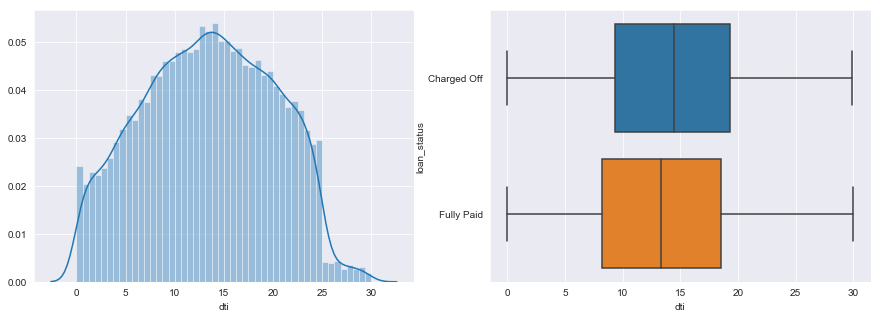

In [127]:
#check distribution of dti
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loans_master.dti)
plt.subplot(1,2,2)
sns.boxplot(loans_master.dti,loans_master.loan_status)
plt.show()

The dti  value is distributed from 0 to 30. For defaulted loans,median dti and quartile values is higher compared to paid loans. 

In [128]:
#create segments for further data understanding
def dti_bin(n):
    if n < 5:
        return 'Very Low'
    elif n >=5 and n <10:
        return 'Low'
    elif n >= 10 and n <  15:
        return 'Average'
    elif n >= 15 and n <  20:
        return 'Moderately High'
    elif n >= 20 and n <  25:
        return 'High'
    else:
        return 'Very High'
loans_master['dti_bin'] = loans_master['dti'].apply(lambda x: dti_bin(x))


In [129]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='dti_bin',aggfunc='mean')

dti_bin,Average,High,Low,Moderately High,Very High,Very Low
is_default,0.141203,0.162433,0.118763,0.151797,0.135182,0.117274


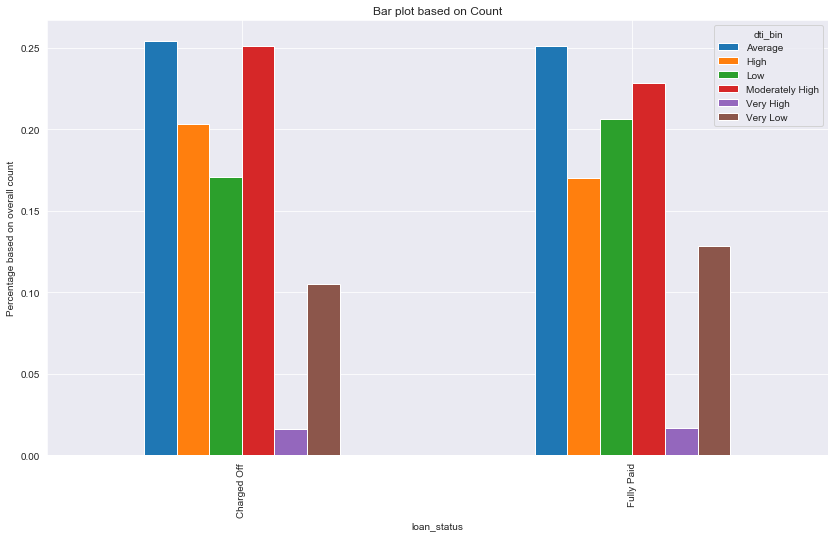

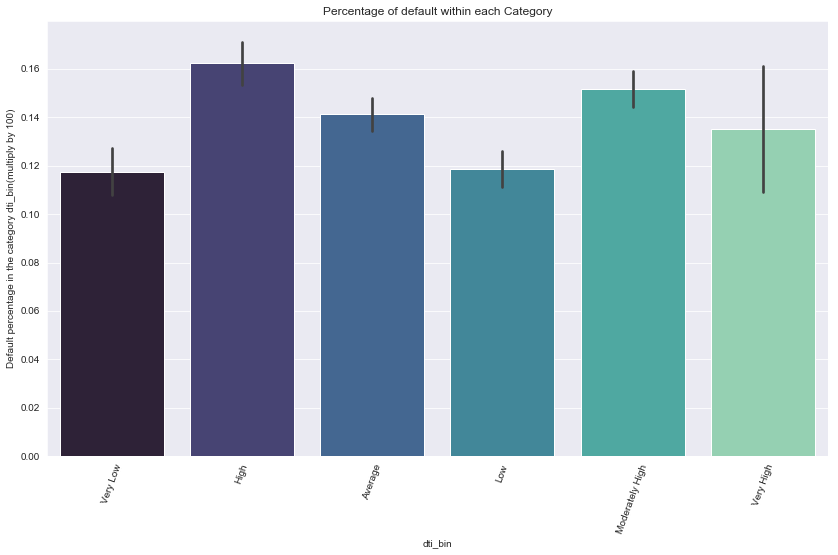

In [130]:
cat_Bar_Plot(loans_master,'dti_bin')

**Observation:** Most of the default loans has dti between 10 to 20.The above plots show that the higher the debt to income ratio, higher is the rate of loan defaults.  There is apprximately 5% difference between highest and lowest.

**delinq_2yrs**

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years



In [131]:
loans_master.delinq_2yrs.describe()

count    35367.000000
mean         0.146323
std          0.493060
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [132]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='delinq_2yrs',aggfunc='mean')

delinq_2yrs,0,1,2,3,4,5,6,7,8,9,11
is_default,0.138109,0.147329,0.18241,0.132275,0.226415,0.142857,0.1,0.25,0.5,0.0,0.0


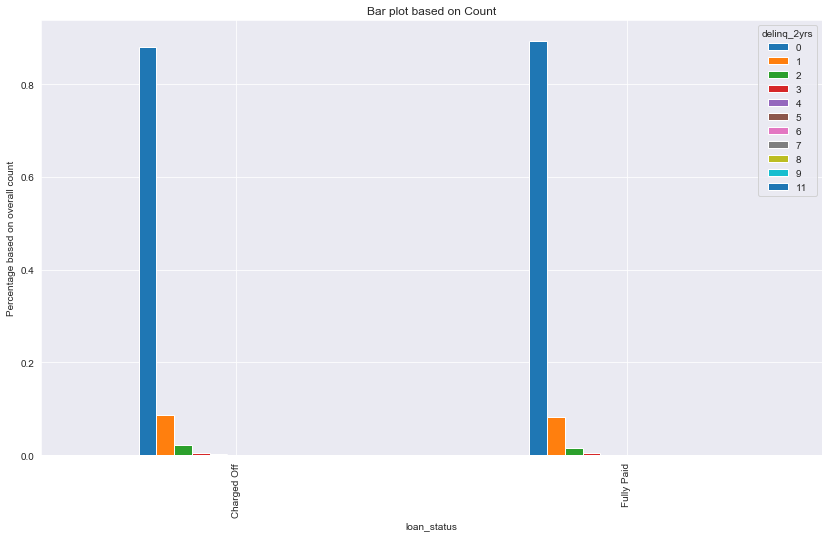

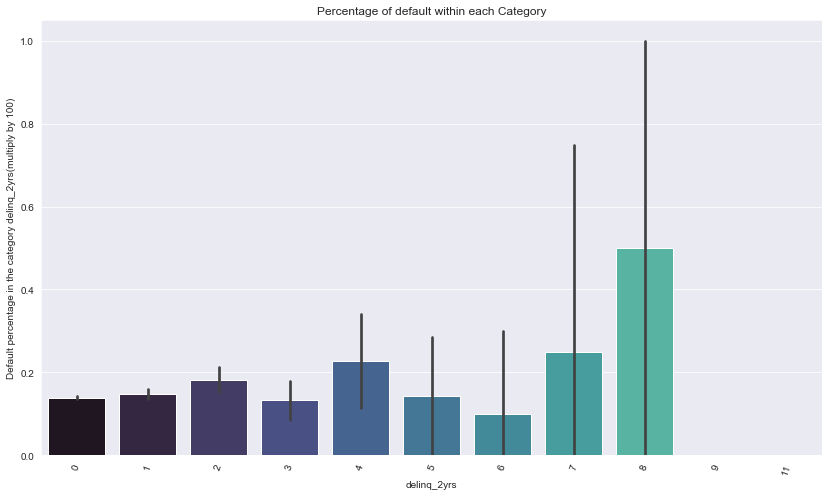

In [133]:
cat_Bar_Plot(loans_master,'delinq_2yrs')

**Observation:** 
Most of the loans have no delinquency records. However, the default rate increases with increase in delinquency record

**earliest_cr_line**

The month the borrower's earliest reported credit line was opened



In [134]:
#filter the year from date
loans_master['earliest_cr_line_year']=loans_master.earliest_cr_line.dt.year
default_loans['earliest_cr_line_year']=default_loans.earliest_cr_line.dt.year
paid_loans['earliest_cr_line_year']=paid_loans.earliest_cr_line.dt.year

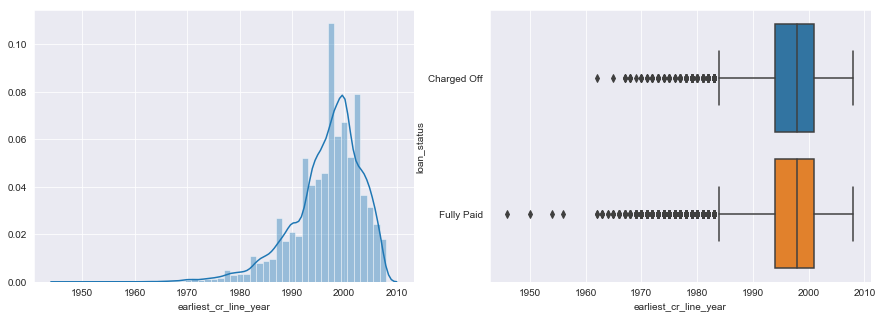

In [135]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loans_master.earliest_cr_line_year)
plt.subplot(1,2,2)
sns.boxplot(loans_master.earliest_cr_line_year,loans_master.loan_status)
plt.show()

In [136]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='earliest_cr_line_year',aggfunc='mean')

earliest_cr_line_year,1946,1950,1954,1956,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
is_default,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.2,0.0,0.25,0.333333,0.045455,0.114286,0.090909,0.172414,0.179487,0.081633,0.105263,0.042857,0.103448,0.111111,0.210526,0.068966,0.100671,0.12766,0.159574,0.103152,0.155844,0.102804,0.12987,0.147745,0.121854,0.125683,0.145369,0.122732,0.129176,0.128852,0.143458,0.124314,0.15043,0.149085,0.145826,0.154734,0.137348,0.129398,0.116019,0.127646,0.157133,0.183099,0.2,0.179856


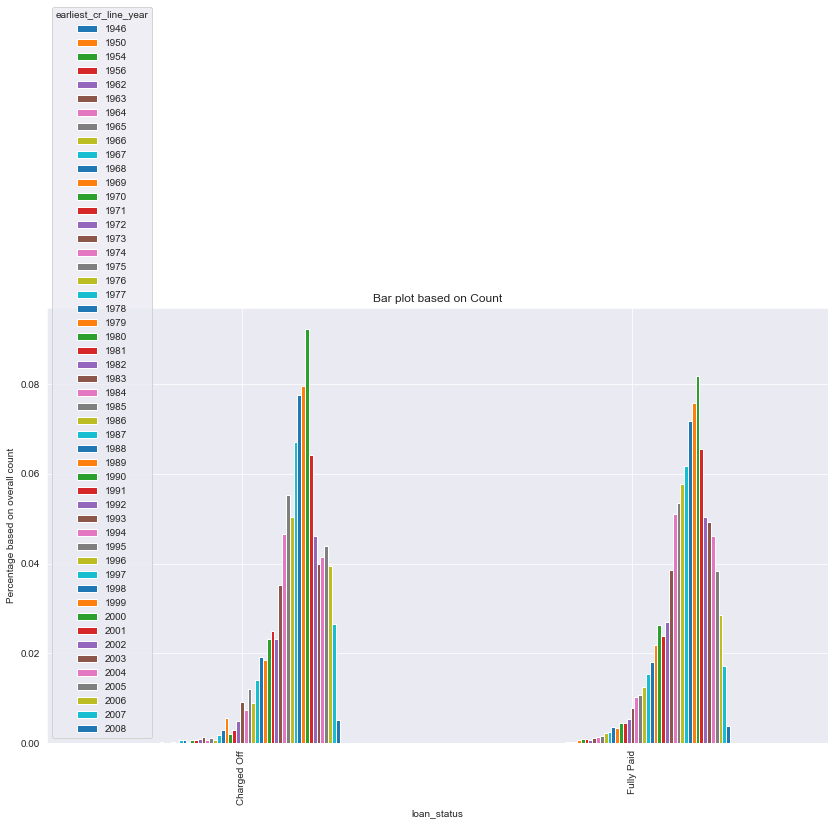

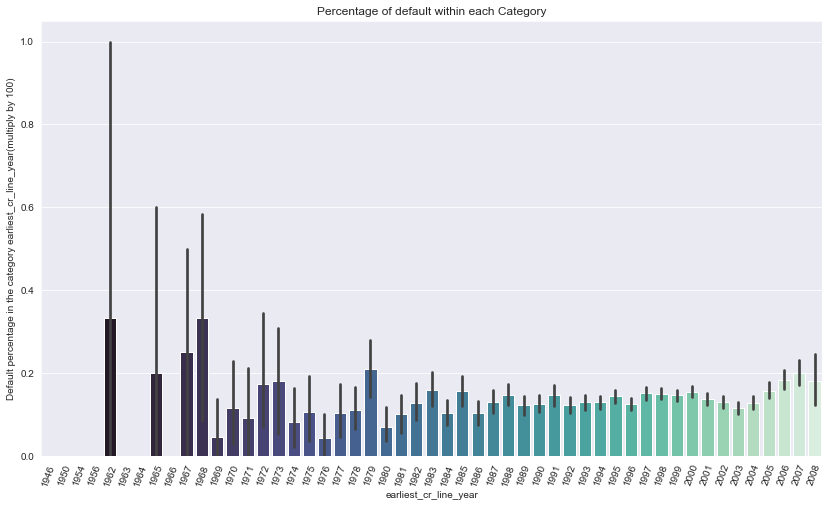

In [137]:
cat_Bar_Plot(loans_master,'earliest_cr_line_year')

8% of the loan applicants have 2000 as the year of earliest credit line. There are spikes in default rates by borrowers whose earliest credit lines are before 1980, they can be treated outlier as there are very few of them as per the distributiona and box plot

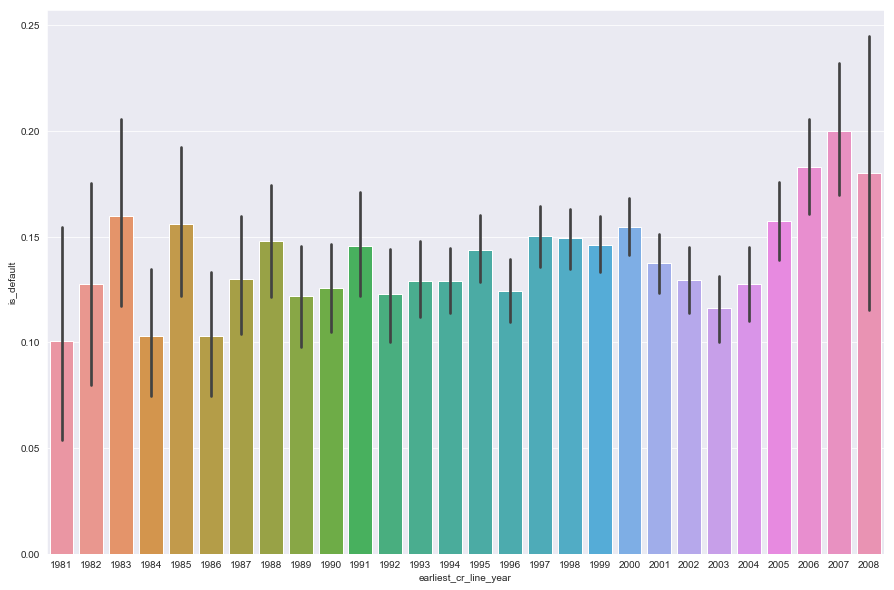

In [138]:
plt.figure(figsize=(15,10))
sns.barplot(x='earliest_cr_line_year', y='is_default', data=loans_master.loc[loans_master['earliest_cr_line_year'] > 1980])
plt.show()

Borrowers whose earlier credit line is after 2005 has higher default rate compared to those earlier. Although there are spikes like 1983,1986. However, there is no significant pattern in the increase

**inq_last_6mths**

The number of inquiries in past 6 months (excluding auto and mortgage inquiries)


In [139]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='inq_last_6mths',aggfunc='mean')

inq_last_6mths,0,1,2,3,4,5,6,7,8
is_default,0.116743,0.152241,0.158794,0.200148,0.125,0.178862,0.259259,0.258065,0.181818


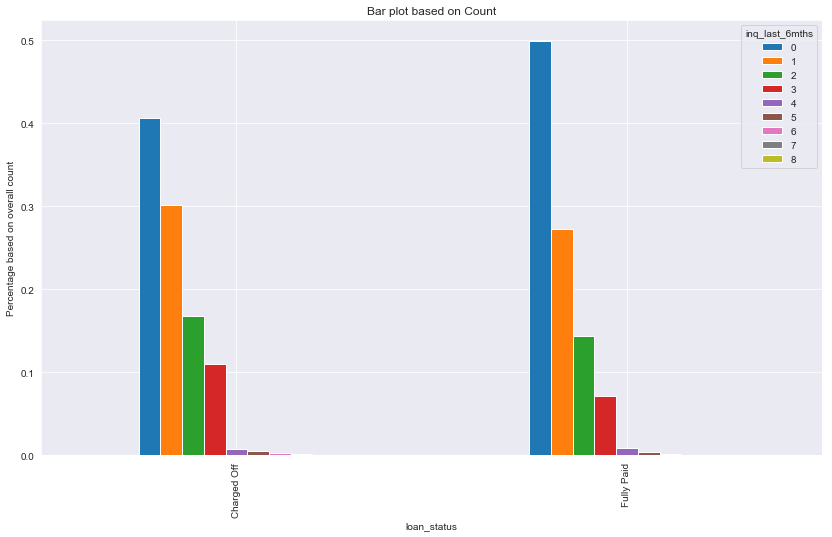

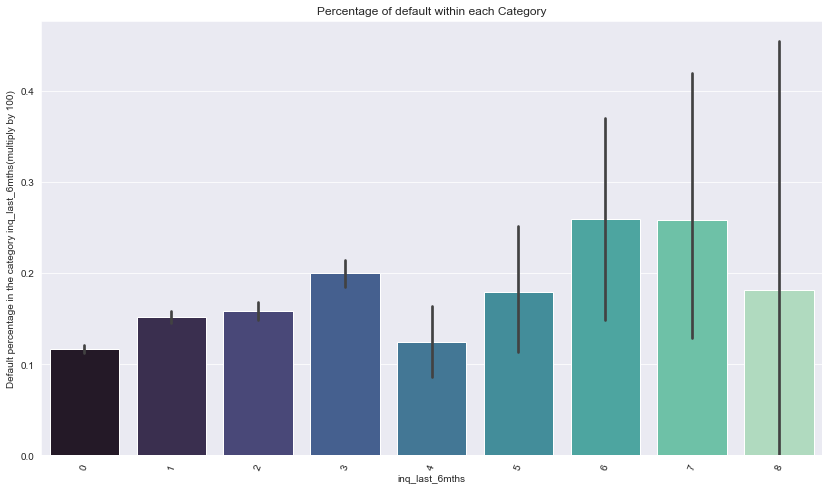

In [140]:
cat_Bar_Plot(loans_master,'inq_last_6mths')

**Observation:** Most of the borrowers do not make any inquiry.People more than 2 inquiries default at higher rates. There is about 15% difference in default rate between highest and lowest. 

**open_acc**

The number of open credit lines in the borrower's credit file.



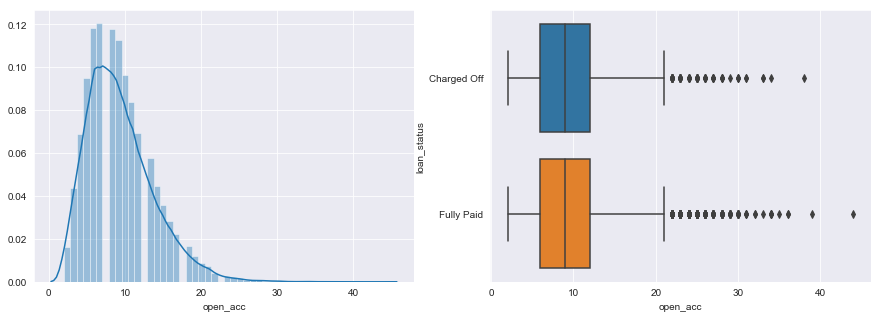

In [141]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loans_master.open_acc)
plt.subplot(1,2,2)
sns.boxplot(loans_master.open_acc,loans_master.loan_status)
plt.show()

**Observation:** 
The distribution is similar for both paid and defaulted loans. Hence, it is not a significant factor

**pub_rec**


Number of derogatory public records


In [142]:
#the below table gives percentage default in each segment
#the mean *100 is equivalent to percentage of that category that are 1. The values of is_default are 1 and 0. 
#So mean(sum/total)*100 would effectively gove away the percentage

loans_master.pivot_table(values='is_default',columns='pub_rec',aggfunc='mean')

pub_rec,0,1,2,3,4
is_default,0.135607,0.215795,0.227273,0.0,0.0


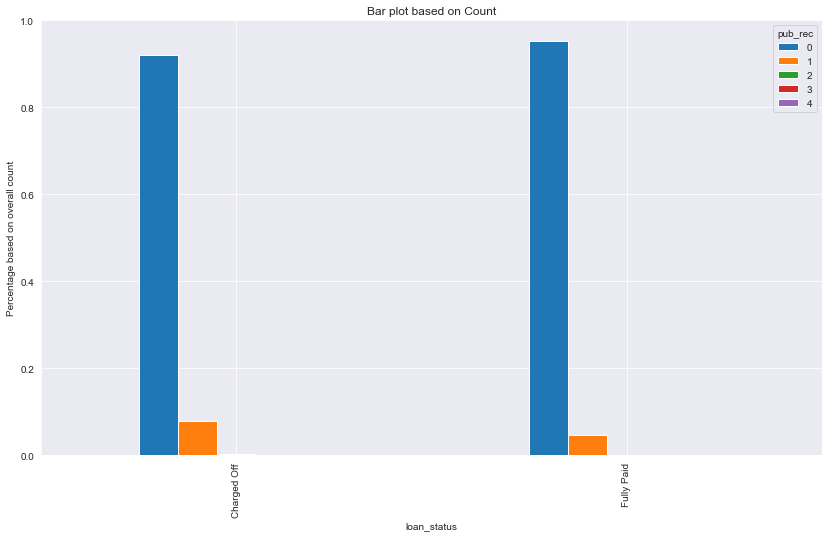

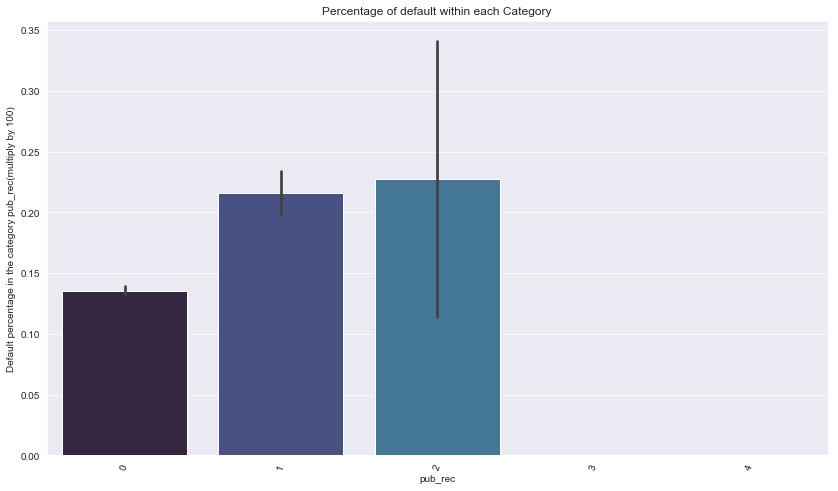

In [143]:
cat_Bar_Plot(loans_master,'pub_rec')

**Observation:** Most borrowers do not have derogatory public records. However, the default rate increases if there are 1 or more records

**revol_bal**

Total credit revolving balance



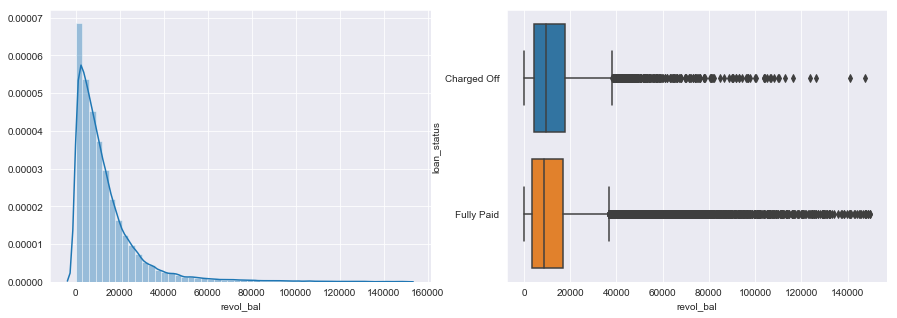

In [144]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loans_master.revol_bal)
plt.subplot(1,2,2)
sns.boxplot(loans_master.revol_bal,loans_master.loan_status)
plt.show()

**observation:** The data is right skewed. There are no significant differences in revol_bal betweem paid and default loans.

**revol_util**

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [145]:
loans_master.groupby('loan_status').revol_util.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,56.157504,27.649831,0.0,35.45,59.3,79.2,99.9
Fully Paid,30424.0,47.998719,28.156580,0.0,24.50,48.2,71.2,99.9


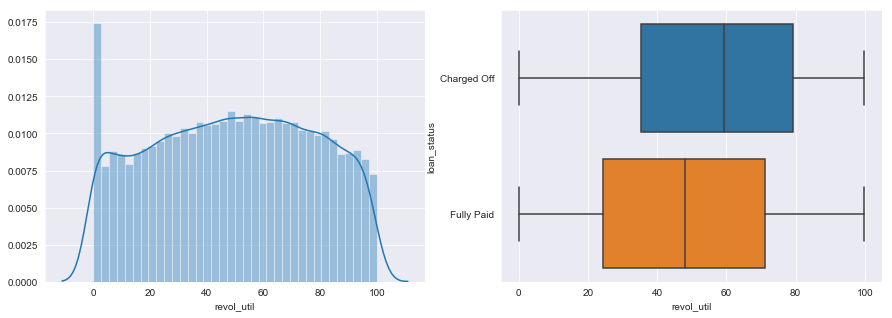

In [146]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loans_master.revol_util)
plt.subplot(1,2,2)
sns.boxplot(loans_master.revol_util,loans_master.loan_status)
plt.show()

In [147]:
#create segments for further data understanding
def revol_util_bin(n):
    if n <=10:
        return '10%'
    elif n >=11 and n<20:
        return '20%'
    elif n >=21 and n<30:
        return '30%'
    elif n >=31 and n<40:
        return '40%'
    elif n >=41 and n<50:
        return '50%'
    elif n >=51 and n<60:
        return '60%'
    elif n >=61 and n<70:
        return '70%'
    elif n >=71 and n<80:
        return '80%'
    elif n >=81 and n<90:
        return '90%'
    else:
        return 'More than 90%'

loans_master['revol_util_bins'] = loans_master['revol_util'].apply(lambda x: revol_util_bin(x))

In [148]:
#the below table gives percentage default in each segment
loans_master.pivot_table(values='is_default',columns='revol_util_bins',aggfunc='mean')

revol_util_bins,10%,20%,30%,40%,50%,60%,70%,80%,90%,More than 90%
is_default,0.093638,0.094222,0.108151,0.117235,0.140456,0.143465,0.157333,0.175592,0.178308,0.169758


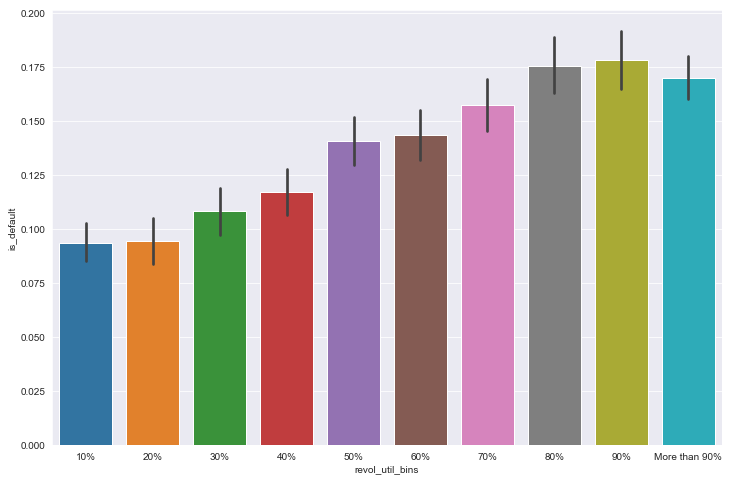

In [149]:
#plot of the above table
plt.figure(figsize=(12,8))

order_list=list(loans_master['revol_util_bins'].unique())
order_list.sort()
sns.barplot(x='revol_util_bins', y='is_default', data=loans_master,order=order_list)
plt.show()

**Observation:**
  
From the above plots, it can be seen that the persons who have defaulted has higher revolving line utilisation. The graph above proves that default rate increases with increasing utilisation of revolving line 

**total_acc**

The total number of credit lines currently in the borrower's credit file


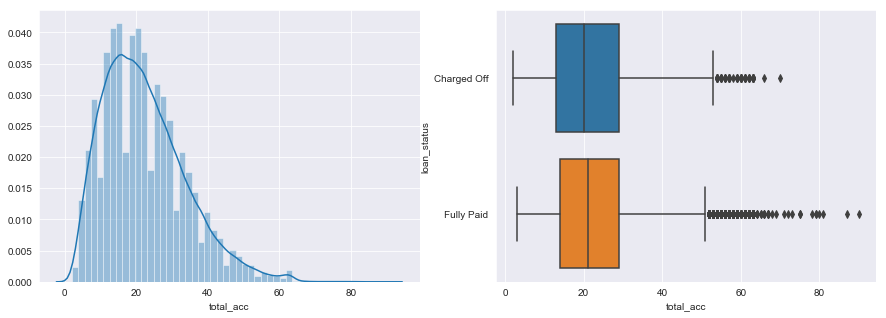

In [150]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(loans_master.total_acc)
plt.subplot(1,2,2)
sns.boxplot(loans_master.total_acc,loans_master.loan_status)
plt.show()

**Observation:** There are no significant differences in  total_account between paid and default loans.

**pub_rec_bankruptcies**

In [151]:
#the below table gives percentage default in each segment
loans_master.pivot_table(values='is_default',columns='pub_rec_bankruptcies',aggfunc='mean')

pub_rec_bankruptcies,0.0,1.0,2.0
is_default,0.136586,0.212432,0.4


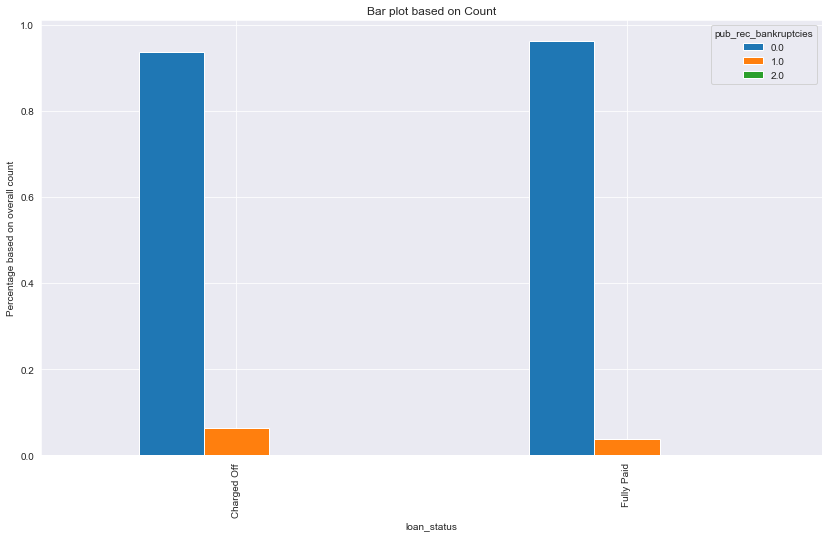

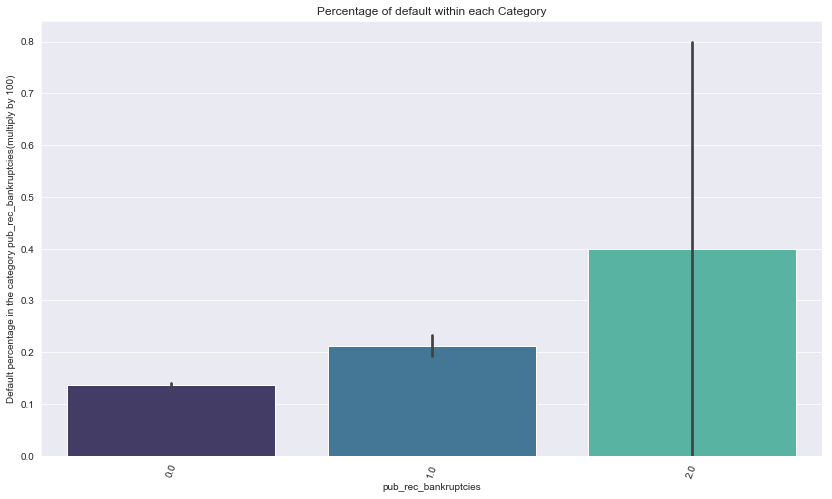

In [152]:
cat_Bar_Plot(loans_master,'pub_rec_bankruptcies')

**Observation:** Most borrowers do not have public records of bankruptcy. However, the default rate increases if there are 1 or more records. This variable can be a key factor in default

Variables like out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,
collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d are not available during the time of loan approval. These columns gives insight about customers payment/behavioural detail. These would be useful in predicting if current loan is likely to default or not.

However, as this analysis is about identifying factors contributing significantly in default loans, these are not useful in this analysis. 



**KEY OBSERVATIONS:**

1.The loan amount is distributed between 0 to 35000. The 75th percentile of the amount is below 15000 i.e. 75% of laons are below 15000. There are few loans more that 30000.

2.For the loans below 30000, the default loans has a median value of 10000 and 75% data are below 16000.

3.Most of the paid/default loans are of 36 months tenure. In case of default loans, 55% are of 36 months, 45% is of 60 months. However, if a loan is of tenure of 60 months, it has higher default rate (25%) compared to loans with 36 months tenure(10%). Tenure is a key factor for default rate.

4.From the above it can be observed that the interest rate varies with most interest rates between 5% to 20%. It can also be obeserved, that loans that have defaulted has higher interest rate compared to those paid. 50% of the interest rates lie between 11.5% to 16.45% for those who have defaulted. There are significant difference between the lowest and highest default rate. So it is a key factor.

5.Most of the paid/default loans have rate between 10 to 15 percent.From the above plots we can observe that Percentage of defaults increases with the increase of interest rates in loan.

6.Most loans have installment between 0 to 600.The  median installment for default loans is higher than paid loans. The default rate of loans increase with the increase of installment amount. However, the difference between highest and lowest is not significant. It is not a key factor.

7.The highest number of loans be it paid or default is for grade B. However, off all the grades, the default rate with a grade is higher if the loan is of grade G followed by grade F and grade E. Grades are key in default as the default increases with degradation.

8.Subgrades like F5, G3 have higher percentage of default rates compared to others. Default tends to increase with decrease in subgrade.

9.Most of the have annual income between 40000 to 80000. The annual income of those who have defaulted is lower compared to those who have paid. It can also be seen, the default percentage is decreasing as annual income is increasing. So it is a key factor.

10.Most of the employees of the loans have 10+ years. All employees have similar ratio of default/nondefault loans. So it cannot be considered as a contributing factor for default loans.

11.Most loans are not verified. Among defaulted loans, about 37.5% are not verified, 36% are verified. However, it can be seen that loans which has source verified or verified has higher percentage of default compared to loans are not verified. It is not a key factor as all categories show similar default ratio with minor differences in percentage.

12.More than 50% of the defaulted loans has purpose of debt_consolidation.However, if a borrower has mentioned the purpose as small_business, the average default rate within that purpose is significantly higher than other purposed mentioned

13.Most loans are of State CA. About 20% of the defaulted loans are from CA.The 4th plot shows that if the state is NV or AK, there are higher rate of defaults.

14.The number of loans be it default or paid has increased from 2007 to 2011.It can also be seen that about 35% of loans issued in 2007 has defaulted. The percentage had then decreased but there was an increase in default percentage in 2011.

15.It can be seen that there is a increase of loans approved as the year end approches near. December sees most number of loans issued. Also loans issued in December has highest default rates while loans issued in February has lowest default rate. The difference in percentage between highest and lowest is about 4%.

16.Most of the default loans has dti between 10 to 20. The higher the debt to income ratio, higher is the rate of loan defaults. There is apprximately 5% difference between highest and lowest.

17.Most of the loans have no delinquency records. However, the default rate increases with increase in delinquency record. So it is a key factor.

18.Borrowers whose earlier credit line is after 2005 has higher default rate compared to those earlier. Although there are spikes like 1983,1986.However, there is no significant pattern in the increase.

19.Most of the borrowers do not make any inquiry.People more than 2 inquiries default at higher rates. There is about 15% difference in default rate between highest and lowest. This variable is a key factor.

20.Most borrowers do not have derogatory public records. However, the default rate increases if there are 1 or more records. This variable can be a key factor in default

21.There are no significant differences in revol_bal betweem paid and default loans.

22.It can be seen that the persons who have defaulted has higher revolving line utilisation. The graph above proves that default rate increases with increasing utilisation of revolving line. It is a key factor in loan default.

23.Most borrowers do not have public records of bankruptcy. However, the default rate increases if there are 1 or more records. This variable can be a key factor in default

**Conclusions:**

Variables like term,int_rate,grade,sub grade,annual income, purpose, dti, year issued, month issued,delinquency records,derogatory public record, utilisation of revolving line,public record of bankruptcy are key strong indicators of loan default.
